In [3]:
%run StoreTweetsBackend.ipynb

Growth SET
GPU ACTIVE
{'limit': 15, 'remaining': 15, 'reset': 1618492434}
{'limit': 900, 'remaining': 900, 'reset': 1618492434}
sentimentDB exists.
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'sentimentDB')


# Sentiment

## Load Tweet Data

https://www.kaggle.com/omermetinn/tweets-about-the-top-companies-from-2015-to-2020

In [1]:
datasets=["Company.csv","Company_Tweet.csv","Tweet.csv"]
tweetdata= (pd.read_csv("D:/Downloads/archive (1)/{0}".format(datasets[2]),parse_dates=[0])).sort_values('post_date')
tweetdata=tweetdata.set_index(pd.to_datetime(tweetdata["post_date"], unit='s',utc=True).dt.date)
tweetdata=tweetdata.drop(columns=["writer","tweet_id",'post_date',"comment_num","retweet_num","like_num"])
# tweetdata=load("tweetdata")

NameError: name 'pd' is not defined

Sentiment140

In [2]:
sentiment140Value=(getQueryFromMongoDB("sentiment140").sort_values('SentimentScore'))[["_id",'SentimentScore','tweetText']]
sentiment140Value=sentiment140Value.drop_duplicates(subset=['tweetText'], keep='last')
sentiment140Value=sentiment140Value.sample(frac=1)

NameError: name 'getQueryFromMongoDB' is not defined

## Creating a Tweet Preprocessor

In [4]:
# lemmatizer = WordNetLemmatizer() 
lemmatizer = SnowballStemmer("english") 
# lemmatizer = PorterStemmer("english")
# stemm=lemmatizer.lemmatize
stemm=lemmatizer.stem
punctuations=set(string.punctuation)
stopwordset=set(stopwords.words('english'))
stopwordsetNP=[re.sub(r"'",'',w) for w in stopwordset]
trans=str.maketrans('','',string.punctuation)
wpt = nltk.WordPunctTokenizer()

In [5]:
def preprocess(text):
        text = text.lower()
        text = re.sub(r"((((https?)?:\/\/)(www\.)?|www\.))([a-z0-9.]+)(\.[a-z]{2,4})(\.[a-z]{1,2})?([^?\s]+(\?((\w+)(=[^&\s]+)?&?)+)?)?",' LINKTAG ',text)    
        text = re.sub(r'[\w\.-]+@[\w\.-]+\.[\w\.\_]+',' EMAILTAG ', text)
        text = re.sub(r'(@[\w]+)',' USERNAMETAG ', text) #1
        text = re.sub(r"\#[a-zA-Z0-9_-]+", " HASHTAG ", text)
        text = re.sub(r"[']+",'', text)
        text = re.sub(r"[_]+",' ', text)
        text = re.sub(r"[^ a-zA-Z]+", " ", text)#1
        text = re.sub(r"\b(.)\1{1,}", r" \1", text)
        text = re.sub(r"(.)\1{2,}", r"\1\1", text)
        text = re.sub(r" \w ", " ", text)
        text = wpt.tokenize(text)
        text = nltk.pos_tag(text)
        text = nltk.ne_chunk(text, binary=True)
        new_text = []
        for word in text:
            if(isinstance(word[0],str)): 
                new_text.append(word[0] + "/" + word[1])
            else :
                temp=""
                for w in word:
                    temp+="/"+(w[0] + "/" + w[1])
                new_text.append(temp)
        text=new_text
#         text = TreebankWordDetokenizer().detokenize(new_text)
        return text

In [6]:
def preprocess(text):
        text = text.lower()
        text = re.sub(r"((((https?)?:\/\/)(www\.)?|www\.))([a-z0-9.]+)(\.[a-z]{2,4})(\.[a-z]{1,2})?([^?\s]+(\?((\w+)(=[^&\s]+)?&?)+)?)?",' LINKTAG ',text)    
        text = re.sub(r'[\w\.-]+@[\w\.-]+\.[\w\.\_]+',' EMAILTAG ', text)
        text = re.sub(r'(@[\w]+)',' USERNAMETAG ', text) #1
        text = re.sub(r"\#[a-zA-Z0-9_-]+", " HASHTAG ", text)
        text = re.sub(r"[']+",'', text)
        text = re.sub(r"[_]+",' ', text)
        text = re.sub(r"[^ a-zA-Z]+", " ", text)#1
        text = re.sub(r"\b(.)\1{1,}", r" \1", text)
        text = re.sub(r"(.)\1{2,}", r"\1\1", text)
        text = re.sub(r" \w ", " ", text)
#         text = wpt.tokenize(text)
#         text = TreebankWordDetokenizer().detokenize(text)
        return text
# sentiment140Value["tweetText"][:10000].apply(preprocess).to_csv("processedText.csv")

## Preprocess Tweets

In [7]:
def plotGrid(model,tuned_parameters):
    grid=GridSearchCV(model,tuned_parameters,n_jobs=-1,cv=5)
    grid.fit(sss["processed"], sss[original3].values.flatten())
    ngram_range=[str(s) for s in grid.cv_results_['param_bow__ngram_range'].tolist()]
    scores=grid.cv_results_["mean_test_score"]
    plt.figure()
    plt.bar(ngram_range, scores.tolist(), width=1.3, color='b')
    best_score_idx = np.argmax(grid.cv_results_['mean_test_score']) 
    lower =grid.cv_results_['mean_test_score'][best_score_idx]- grid.cv_results_['std_test_score'][best_score_idx]
    plt.axhline(lower, linestyle='--', color='.5', label='Best score - 1 std')
    plt.axhline(np.max(scores), linestyle='--', color='y',label='Best score')
    plt.title("")
    plt.xlabel('param_bow ngram_range')
    plt.ylabel('mean_CV_score')
    plt.xticks(ngram_range)
    plt.ylim((0, 1.0))
    plt.legend(loc='upper left')
# plotGrid(model,tuned_parameters)

In [8]:
# binary=["binary"]
# hinge=["hinge"]
# cat3=["C3-bad","C3-Neutral","C3-good"]
# cat5=["C5-very bad","C5-bad","C5-Neutral","C5-good","C5-very good"]
# sentiment140Value[binary]=sentiment140Value['SentimentScore'].replace({4: 1})#binary
# sentiment140Value[hinge]=sentiment140Value['SentimentScore'].replace({4: 1,0: -1})#Hinge/sq
# sentiment140Value[cat3]=to_categorical(sentiment140Value['SentimentScore'].replace({4: 2,0: 0}))
# sentiment140Value[cat5]=to_categorical(sentiment140Value['SentimentScore'])
# allscores.extend(cat3)
# allscores.extend(binary)
# allscores.extend(hinge)
# allscores.extend(cat5)
original3=["original3"]
cat2=["C2-bad","C2-good"]
sentiment140Value[original3]=sentiment140Value['SentimentScore'].replace({4: 1})
sentiment140Value[cat2]=to_categorical(sentiment140Value['SentimentScore'].replace({4: 1}))
allscores=[]
allscores.extend(cat2)
allscores.extend(original3)
allscores.extend(['SentimentScore'])  


In [9]:
num=len(sentiment140Value)
# num=1000
# print(num)
sss=sentiment140Value[:num]
sss["processed"]=sss["tweetText"][:num].apply(preprocess)
sss=sss.drop_duplicates(subset=["processed"], keep='last')
sss.to_csv("PT.csv")
sss=sss.sample(frac=1)
trainX, testX, trainY, testY =train_test_split(sss["processed"], sss[allscores],shuffle=True, test_size=0.2,random_state=0)

<ipython-input-9-5a4fad993c07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sss["processed"]=sss["tweetText"][:num].apply(preprocess)


<BarContainer object of 44 artists>

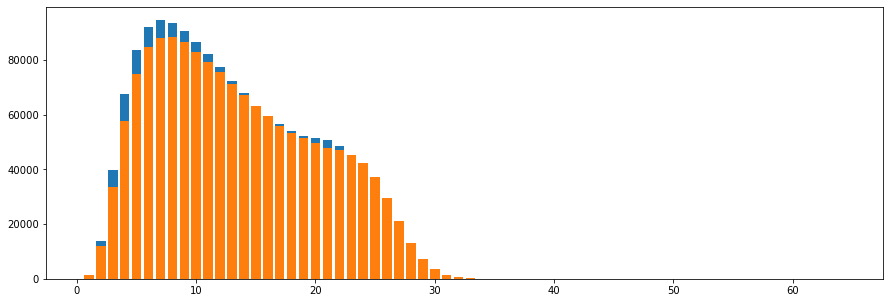

In [10]:
sss["len"]=sss["processed"].apply(lambda x:len(x.split()))
sss[["len","processed"]].sort_values(by="len").to_csv("PT.csv")
sss["len2"]=sss["tweetText"].apply(lambda x:len(x.split()))
pp=pd.DataFrame(sss["len"].value_counts())
pp2=pd.DataFrame(sss["len2"].value_counts())
plt.bar(pp.index,pp["len"].values)
plt.bar(pp2.index,pp2["len2"].values)

In [11]:
result=pd.DataFrame(columns=["model","ngram","Precision","Recall", "Accuracy","MCC","AUC"])
counter=0

In [237]:
params = [(1,1),(1,2),(1,3)]

In [13]:
# model = Pipeline([
#         ('bow', CountVectorizer(max_features=None,preprocessor=None,ngram_range=(1,3),lowercase=False)),  # strings to token integer counts
#         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#         ('classifier', SVC(cache_size=1000)),  # train on TF-IDF vectors w/ Naive Bayes classifier
#     ])
# model.fit(trainX.values, trainY[original3].values.flatten())
# pred=model.predict(testX.values)
# print(confusion_matrix(testY[original3].values,pred))
# print(classification_report(testY[original3].values,pred))

In [14]:
for param in params:
    print("MNB_NGRAM: "+str(param))
    model = Pipeline([('bow', CountVectorizer(max_features=None,preprocessor=None,ngram_range=param,lowercase=False)), 
                      ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB()),])
    model.fit(trainX.values, trainY[original3].values.flatten())
    pred=model.predict(testX.values)
#     print(confusion_matrix(testY[original3].values,pred))
#     print(classification_report(testY[original3].values,pred))
#     print("MCC",matthews_corrcoef(testY[original3].values,pred))
#     print("AUC",metrics.roc_auc_score(testY[original3].values,pred))
#     precision_recall_fscore_support(testY[original3].values,pred, average='micro')
    per,rec,f1=metrics.precision_recall_fscore_support(testY[original3].values,pred, average='micro')[:3]
    result.loc[counter]=["MNB",str(param),matthews_corrcoef(testY[original3].values,pred),per,rec,f1,metrics.roc_auc_score(testY[original3].values,pred)]
    counter+=1

MNB_NGRAM: (1, 1)
MNB_NGRAM: (1, 2)
MNB_NGRAM: (1, 3)


In [15]:
for param in params:
    print("LR_NGRAM: "+str(param))
    model = Pipeline([('bow', CountVectorizer(max_features=None,preprocessor=None,ngram_range=param,lowercase=False)),
                      ('tfidf', TfidfTransformer()),('classifier',LogisticRegression()), ])    
    model.fit(trainX.values, trainY[original3].values.flatten())
    pred=model.predict(testX.values)
#     print(confusion_matrix(testY[original3].values,pred))
#     print(classification_report(testY[original3].values,pred))
#     print("MCC",matthews_corrcoef(testY[original3].values,pred))
#     print("AUC",metrics.roc_auc_score(testY[original3].values,pred))
    per,rec,f1=metrics.precision_recall_fscore_support(testY[original3].values,pred, average='micro')[:3]
    result.loc[counter]=["LR",str(param),matthews_corrcoef(testY[original3].values,pred),per,rec,f1,metrics.roc_auc_score(testY[original3].values,pred)]
    counter+=1

LR_NGRAM: (1, 1)


C:\Users\mech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_NGRAM: (1, 2)


C:\Users\mech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_NGRAM: (1, 3)


C:\Users\mech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
result

,model,ngram,Precision,Recall,Accuracy,MCC,AUC
0,MNB,"(1, 1)",0.545795,0.772787,0.772787,0.772787,0.772709
1,MNB,"(1, 2)",0.608514,0.803481,0.803481,0.803481,0.803311
2,MNB,"(1, 3)",0.615539,0.806744,0.806744,0.806744,0.806552
3,LR,"(1, 1)",0.600519,0.800181,0.800181,0.800181,0.800223
4,LR,"(1, 2)",0.647671,0.823810,0.823810,0.823810,0.823832
5,LR,"(1, 3)",0.646244,0.823125,0.823125,0.823125,0.823109


### Text Preprocessing

### Testing Various Input Configurations 

### DNN

In [18]:
# vec_layer = TextVectorization(ngrams=param,max_tokens=None,output_sequence_length=50)
# vec_layer.adapt(trainX.tolist())
# tf.keras.backend.clear_session()
callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=1)]
def DNN(sequence_length = 60, embedding_dim=16,optimizer='adam'):
    M = Sequential()
    M.add(vec_layer),
    M.add(Embedding(input_dim=len(vec_layer.get_vocabulary()),output_dim=embedding_dim,mask_zero=True))
    M.add(Dense(16, activation="elu"))
    M.add(Dense(16, activation="elu"))
    M.add(Flatten())
    M.add(Dense(50, activation="elu"))
    M.add(Dense(2,activation='softmax')) 
    M.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"]) 
    return M
# model =DNN( sequence_length = 70, embedding_dim=16,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
# H=model.fit(trainX, trainY[cat2],epochs=1, batch_size=100, validation_split=0.1, callbacks=callbacks)
# model.summary()
# plotCompare(H.history['loss'],H.history['val_loss'],["train","test"])

In [19]:
# pred=model.predict(testX)
# print(confusion_matrix(testY[original3],pd.DataFrame( pred,columns=[0,1]).idxmax(axis=1)))
# print(classification_report(testY[original3],pd.DataFrame( pred,columns=[0,1]).idxmax(axis=1)))

In [21]:
tf.get_logger().setLevel('ERROR')
for param in params:
    tf.keras.backend.clear_session()
    vec_layer = TextVectorization(ngrams=param,max_tokens=None,output_sequence_length=50)
    vec_layer.adapt(trainX.tolist())
    model =DNN( sequence_length = 50, embedding_dim=16,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
    model.fit(trainX, trainY[cat2],epochs=1, batch_size=500, validation_data=(testX,testY[cat2]), callbacks=callbacks)
    pred=pd.DataFrame( model.predict(testX),columns=[0,1]).idxmax(axis=1) 
    per,rec,f1=metrics.precision_recall_fscore_support(testY[original3].values,pred, average='micro')[:3]
    result.loc[counter]=["DNN",str(param),matthews_corrcoef(testY[original3].values,pred),per,rec,f1,metrics.roc_auc_score(testY[original3].values,pred)]
    print( result.loc[counter])
    counter+=1

2207/2207 [==============================] - 64s 29ms/step - loss: 0.4738 - accuracy: 0.7713 - val_loss: 0.4309 - val_accuracy: 0.8013
model             DNN
ngram          (1, 1)
Precision    0.605763
Recall       0.801944
Accuracy     0.801944
MCC          0.801944
AUC          0.801758
Name: 6, dtype: object
2207/2207 [==============================] - 693s 313ms/step - loss: 0.4541 - accuracy: 0.7846 - val_loss: 0.3917 - val_accuracy: 0.8215
model             DNN
ngram          (1, 2)
Precision     0.64771
Recall       0.823859
Accuracy     0.823859
MCC          0.823859
AUC          0.823853
Name: 7, dtype: object
2207/2207 [==============================] - 1845s 835ms/step - loss: 0.4642 - accuracy: 0.7760 - val_loss: 0.3981 - val_accuracy: 0.8196
model             DNN
ngram          (1, 3)
Precision    0.639339
Recall       0.819659
Accuracy     0.819659
MCC          0.819659
AUC          0.819629
Name: 8, dtype: object


In [24]:
result.to_csv("results")

In [25]:
# result=pd.read_csv("result")

,model,ngram,Precision,Recall,Accuracy,MCC,AUC
0,MNB,"(1, 1)",0.545795,0.772787,0.772787,0.772787,0.772709
1,MNB,"(1, 2)",0.608514,0.803481,0.803481,0.803481,0.803311
2,MNB,"(1, 3)",0.615539,0.806744,0.806744,0.806744,0.806552
3,LR,"(1, 1)",0.600519,0.800181,0.800181,0.800181,0.800223
4,LR,"(1, 2)",0.647671,0.823810,0.823810,0.823810,0.823832
5,LR,"(1, 3)",0.646244,0.823125,0.823125,0.823125,0.823109
6,DNN,"(1, 1)",0.605763,0.801944,0.801944,0.801944,0.801758
7,DNN,"(1, 2)",0.647710,0.823859,0.823859,0.823859,0.823853
8,DNN,"(1, 3)",0.639339,0.819659,0.819659,0.819659,0.819629


In [22]:
# tf.keras.backend.clear_session()
# def LSTM_model(hp=None):
#     hp_ngrams = hp.Choice('ngrams', values=[1,2,3])
#     vec_layer = TextVectorization(ngrams=hp_ngrams,max_tokens=None,output_sequence_length=50)
#     vec_layer.adapt(trainX.tolist())
#     M = Sequential()
#     M.add(vec_layer),
#     M.add(Embedding(input_dim=len(vec_layer.get_vocabulary()),output_dim=16,mask_zero=True))
#     M.add(LSTM(50, kernel_regularizer=tf.keras.regularizers.L2(l2=0.5), return_sequences =True))
#     M.add(Activation(tf.keras.activations.relu))
#     M.add(LSTM(50, kernel_regularizer=tf.keras.regularizers.L2(l2=0.2), return_sequences =False))
#     M.add(Activation(tf.keras.activations.relu))
#     M.add(Dense(50, kernel_regularizer=tf.keras.regularizers.L2(l2=0.2), activation=LeakyReLU()))
#     M.add(Dense(2,activation='softmax')) 
#     M.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="categorical_crossentropy",metrics=["accuracy"]) 
#     return M 
# tuner = kt.RandomSearch (LSTM_model, objective='val_loss', executions_per_trial=1, overwrite=True, max_trials=100,directory='my_dir',project_name='DNN')
# tuner.search(trainX, trainY[cat2], epochs=1, validation_data=(testX, testY[cat2]),batch_size=75, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=1)])
# tuner.results_summary()

### LSTM

In [235]:
tf.keras.backend.clear_session()
callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=1)]
def LSTM_model(sequence_length = 140, embedding_dim=16,ngram=1,optimizer='adam',hidden=16):
    M = Sequential()
    M.add(vec_layer),
    M.add(Embedding(input_dim=len(vec_layer.get_vocabulary()),output_dim=embedding_dim,mask_zero=True))
    M.add(LSTM(16, 'elu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.5), return_sequences =True))
    M.add(LSTM(1,'elu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.2), return_sequences =True))
    M.add(Flatten())
    M.add(Dense(10,activation='elu'))
    M.add(Dense(2,activation='softmax')) 
    M.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"]) 
    return M
# model =LSTM_model(sequence_length = 50, embedding_dim=16,ngram=2,optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),hidden=50)
# H=model.fit(trainX, trainY[cat2],epochs=100, batch_size=500, validation_split=0.1, callbacks=callbacks)
# plotCompare(H.history['loss'],H.history['val_loss'],["train","test"])
# model.summary()

In [236]:
tf.get_logger().setLevel('ERROR')
for param in params:
    tf.keras.backend.clear_session()
    vec_layer = TextVectorization(ngrams=param,max_tokens=None,output_sequence_length=50)
    vec_layer.adapt(trainX.tolist())
    model =LSTM_model( sequence_length = 50, embedding_dim=16,optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))
    model.fit(trainX, trainY[cat2],epochs=3, batch_size=100, validation_data=(testX,testY[cat2]), callbacks=callbacks)
    pred=pd.DataFrame( model.predict(testX),columns=[0,1]).idxmax(axis=1) 
    per,rec,f1=metrics.precision_recall_fscore_support(testY[original3].values,pred, average='micro')[:3]
    result.loc[counter]=["LSTM",str(param),matthews_corrcoef(testY[original3].values,pred),per,rec,f1,metrics.roc_auc_score(testY[original3].values,pred)]
    counter+=1

NameError: name 'params' is not defined

In [233]:
# r=pd.read_csv("result",index_col)
# result=pd.read_csv("results",index_col=0)

### Transformer Encoder

In [16]:
tf.keras.backend.clear_session()
callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=1)]
# vec_layer = TextVectorization(ngrams=(1,2),max_tokens=None,output_sequence_length=50)
# vec_layer.adapt(trainX.tolist())
def Transformer_Encoder_Model(vocab=len(vec_layer.get_vocabulary()),optimizer=tf.keras.optimizers.Adam(lr=0.001),embedding_dim=16, hidden=16,encoders=5,key_dim=16,l2=0.5):
    x =Input(shape=(1,), dtype=tf.string)
    V =vec_layer(x)    
    E=Embedding(input_dim=vocab,output_dim=embedding_dim,mask_zero=True)(V)#try with or without masking
    E=ScalerMult(embedding_dim)(E)
    P=PositionalEncoding(vocab,embedding_dim)(E)
    p=Masking()(P)#with and without
    out=Encoder(embedding_dim,encoders,hidden,P,key_dim,l2,axis=-1)
    out=Flatten()(out)
    out=Dense(2,'linear')(out)
    out=Dense(2,'softmax')(out)
    M=tf.keras.models.Model(inputs=x,outputs=out) 
    M.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])  
    return M
model=Transformer_Encoder_Model()
# tf.keras.utils.plot_model(Transformer_Encoder_Model())
H=model.fit(trainX.values, trainY[cat2].values,epochs=1,batch_size=100,validation_split=0.1, callbacks=callbacks)
# model.summary()

NameError: name 'vec_layer' is not defined

In [22]:
tf.get_logger().setLevel('ERROR')
for param in params:
    tf.keras.backend.clear_session()
    vec_layer = TextVectorization(ngrams=param,max_tokens=None,output_sequence_length=50)
    vec_layer.adapt(trainX.tolist())
    model =Transformer_Encoder_Model( vocab=len(vec_layer.get_vocabulary()),embedding_dim=16,optimizer=tf.keras.optimizers.Adam(lr=0.001))
    model.fit(trainX, trainY[cat2],epochs=1, batch_size=100, validation_data=(testX,testY[cat2]), callbacks=callbacks)
    pred=pd.DataFrame( model.predict(testX),columns=[0,1]).idxmax(axis=1) 
    per,rec,f1=metrics.precision_recall_fscore_support(testY[original3].values,pred, average='micro')[:3]
    result.loc[counter]=["TFENC",str(param),matthews_corrcoef(testY[original3].values,pred),per,rec,f1,metrics.roc_auc_score(testY[original3].values,pred)]
    counter+=1

11033/11033 [==============================] - 8869s 803ms/step - loss: 2.8143 - accuracy: 0.7695 - val_loss: 0.3888 - val_accuracy: 0.8234


In [23]:
#     tf.keras.backend.clear_session()
#     vec_layer = TextVectorization(ngrams=param,max_tokens=None,output_sequence_length=50)
#     vec_layer.adapt(trainX.tolist())
#     model =Transformer_Encoder_Model( vocab=len(vec_layer.get_vocabulary()),embedding_dim=16,optimizer=tf.keras.optimizers.Adam(lr=0.01))
#     model.fit(trainX, trainY[cat2],epochs=1, batch_size=100, validation_split=0.1, callbacks=callbacks)
#     pred=pd.DataFrame( model.predict(testX),columns=[0,1]).idxmax(axis=1) 
#     per,rec,f1=metrics.precision_recall_fscore_support(testY[original3].values,pred, average='micro')[:3]
#     result.loc[counter]=["TFENC",str(param),matthews_corrcoef(testY[original3].values,pred),per,rec,f1,metrics.roc_auc_score(testY[original3].values,pred)]
#     counter+=1
result.to_csv("result")

## Training & evaluating a model

In [ ]:
# sentiment140Value=(getQueryFromMongoDB("processedSentiment140"))[["_id",'SentimentScore','processed']]
# sentiment140Value=sentiment140Value.sample(frac=1)
# sentiment140Value=sentiment140Value.drop_duplicates(subset=['processed'])
# trainX, testX, trainY, testY =train_test_split(sentiment140Value['processed'], sentiment140Value['SentimentScore'],shuffle=True, test_size=0.2)

In [ ]:
# trainX, testX, trainY, testY =train_test_split(sentiment140Value['tweetText'], sentiment140Value['SentimentScore'],shuffle=True, test_size=0.2)

In [ ]:
# model= getSentimentModel(ngram=(1,3))
# model.fit(trainX, trainY) 
# pred=model.predict(testX)
# print(confusion_matrix(testY,pred))
# print(classification_report(testY,pred))

In [ ]:
# def BiLSTM_model(dataset,vocab_size = 5000, sequence_length = 140, embedding_dim=16,mode='int',ngram=1,activation='relu',optimizer='adam',hidden=16):
#     vec_layer = TextVectorization(
#         standardize=None, 
#         output_mode=mode,    #"int", "binary", "count" or "tf-idf"
#         ngrams=ngram,
# #         max_tokens=vocab_size,
#         pad_to_max_tokens=True,
#         output_sequence_length=sequence_length
#                         )
#     vec_layer.adapt(dataset)
#     M = Sequential()
#     M.add(vec_layer),
#     M.add(Embedding(input_dim=len(vec_layer.get_vocabulary()),output_dim=embedding_dim,mask_zero=True))
#     M.add(Bidirectional(LSTM(embedding_dim)))
#     M.add(Dense(hidden, activation='relu'))
#     M.add(Dense(2, activation='softmax'))    
#     M.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["CategoricalAccuracy"])  
#     return M

## Experiment Results

# Stock Forecasting

## Load Data

Define Which Stock to Use and Prediction Length

In [4]:
stock="MSFT"
# MSFT=loadStockData(stock)
data=load(stock) #Load From Disk. Requires loadStockData to be run at least once for it to store an archived version
period=10 #lookback Period
lookAhead=5 #How many days ahead to predict 
data.drop(columns=["Dividends","Stock Splits"],inplace=True)

In [7]:
def plotMultVariate(Din,Dout,DinSteps):
    for i in range(len(Din)):
        plt.plot(range(i,i+DinSteps),Din[i],'g')
        plt.plot(range(i,i+DinSteps),Dout[i],alpha=0.5)
    plt.show()
def plotVisual(vs,ps,period=period,t=0.5):
    for i in range(len(vs)):
        plotMultVariate(vs[:i],ps,period)
        plt.show()
        time.sleep(0.5)
        clear_output(wait=True) 
def reverseOutputTransform(outputs,dataf):
    return np.exp((outputs.iloc[:,:lookAhead]+dataf[["(L-LR)D"]].values)+dataf[["LR"]].values)
def reverseOutputTransform(outputs,dataf):
    return np.exp((outputs.reshape(outputs.shape[0],-1)+dataf[:,-2])+dataf[:,-1])
def calculateMovingLog(r):
    t0=r.iloc[-1]
    for i in range(len(r)-1):
        r[i]=r[i]+t0
        t0=r[i]
    return r
def reverseOutputTransform(outputs,k0):
    d=pd.DataFrame(scaler.inverse_transform(outputs.reshape(outputs.shape[0],-1)))
    d.loc[:,lookAhead]=k0.flatten()
    d=d.apply(calculateMovingLog,axis=1)
    return np.exp(d)
def reverseOutputTransform(outputs,k=None,logged=False,scaled=False):
    outputs=outputs.copy()
    if scaled: 
        for d in range(lookAhead):outputs[:,d]= scaler.inverse_transform(outputs[:,d])
    if k is not None: outputs=outputs*k
    if logged: outputs=np.exp(outputs)
    return outputs
def evaluatePredictions(true,pred,lookAhead=lookAhead):
    results=[None]*lookAhead
    for i in range(lookAhead):
        m = tf.keras.metrics.MeanSquaredError()
        m.update_state(true[:,i],pred[:,i])
        results[i]=m.result().numpy()
        m.reset_states
    return results
def plotAndEvaluate(vy,predictions):
    rs=evaluatePredictions(vy,predictions)
    for i in range(lookAhead):
        plt.title(str(rs[i]))
        plotCompare(vy[:,i],predictions[:,i],["Y","P"])
    print("Shape  :",predictions.shape[0:])
    print("loss   :",model.evaluate(vx,vy,verbose=0))
    printResults(vy,predictions)


Inspect Data for nulls

In [8]:
data=data.sort_values('Date')
print("NULLs\n")
print(data.isnull().sum())
datarange=[data.index.min().date(), data.index.max().date()]
print("Data Range: ",datarange)

NULLs

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Data Range:  [datetime.date(1986, 3, 13), datetime.date(2021, 4, 5)]


Expand Data To Contain All Days Including The Missing Days 

In [9]:
data=data.resample('D').first()
data["wasNa"]=data['Close'].isna()#mark filled in spots for future reference
print(data["wasNa"].value_counts())

False    8837
True     3971
Name: wasNa, dtype: int64


Fill Gaps

In [10]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
# limit_direction{{‘forward’, ‘backward’, ‘both’}}
data=data.interpolate(method='polynomial', order=2, limit_direction='both')
# data.fillna(0)

Transform

In [11]:
TTI=30
data=data[['Close']]

In [12]:
# data["InOut"]=np.log(data[['Close']].ewm(span=TTI).mean())
# data["InOut"]=np.log(data[['Close']].ewm(halflife=TTI).mean())
# data["InOut"]=np.log(data[['Close']].rolling(TTI).mean())
# data["InOut"]=(data[['Close']].ewm(span=TTI).mean())
data["InOut"]=(data[['Close']].ewm(halflife=TTI).mean())
# data["InOut"]=(data[['Close']].rolling(TTI).mean())

In [13]:
dataIn,dataOut=createTimeSeriesData(data.dropna(),["InOut"],outputColumns=["InOut"],outputlengthTimeSteps=lookAhead,shifts=period)
dataOut["WinMean"]=dataIn.mean(axis=1).values
dataIn=dataIn.div(dataOut["WinMean"].values, axis=0)
dataOut.iloc[:,:lookAhead]=dataOut.iloc[:,:lookAhead].div(dataOut["WinMean"].values, axis=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([[dataIn.min().min()*np.float64(1.05)], [dataIn.max().max()*np.float64(1.05)]]))
# scaler = StandardScaler()
# scaler.fit(dataIn.values[:,0:1])
for d in range(period):dataIn.iloc[:,d]= scaler.transform(dataIn.iloc[:,d].values.reshape(-1,1)).reshape(-1)
for d in range(lookAhead): dataOut.iloc[:,d]= scaler.transform(dataOut.iloc[:,d].values.reshape(-1,1)).reshape(-1)
print("Na Values(Must be zero unless error occurs):\t",(dataOut.isna().sum()).values,(dataIn.isna().sum().values))
print("Positive Vals Check:\t\t\t\t",np.sign(dataIn.min(axis=1)).value_counts().values, np.sign(dataOut.min(axis=1)).value_counts().values)

Na Values(Must be zero unless error occurs):	 [0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]
Positive Vals Check:				 [12794] [10475  2319]


In [15]:
dataIn=(dataIn.to_numpy().reshape(dataIn.shape[0],dataIn.shape[1],-1))
dataOut=(dataOut.to_numpy().reshape(dataOut.shape[0],dataOut.shape[1],-1))

(0.0655859869324169,
 [0.016940985382981135, 0.00023448107000427005, 0.04841052047943151])

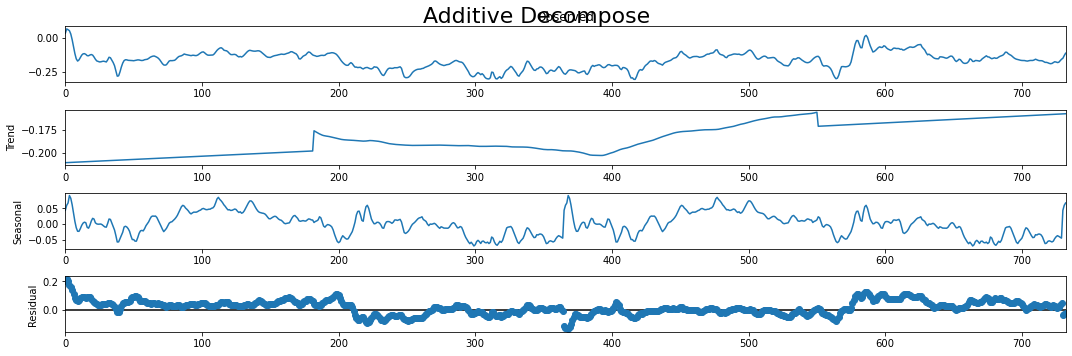

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(dataIn[:733,3], model='a', extrapolate_trend='freq', period=365)
result_add.plot().suptitle('Additive Decompose', fontsize=22) 
r=[result_add.trend.std(),result_add.seasonal.mean(),result_add.resid.std()]
sum(r),r

In [17]:
# (np.exp((data["D_L_R"]+data["L_R"].shift(1))+np.log(data["Close"]).rolling(TTI).mean())).dropna()
# TTI=20
# data=data[['Close']]
# data[str(TTI)+"_D_Mean"]= data[['Close']].rolling(TTI).mean()
# data[str(TTI)+"_D_EWM_span"]= data[['Close']].ewm(span=TTI).mean()
# data[str(TTI)+"_D_EWM_halflife"]= data[['Close']].ewm(halflife=TTI).mean()
# window=data.rolling(TTI)   
# for column in data.columns[:4]:
#     data[column+"_MNorm"]=(data[column]- data[column].mean())/data[column].std()
# for column in data.columns[:4]:
#     data[column+"_RMNorm"]=(data[column]-window[column].mean())/window[column].std()
# data["log_diff"] = np.log(data["Close"]).diff()
# for column in data.columns[:4]: data[column+"_diff"]=data[column].diff() 
# from statsmodels.tsa.seasonal import seasonal_decompose
# r=[]
# for column in data.columns[-3:]: 
#     result_add = seasonal_decompose(data[column].dropna(), model='a', extrapolate_trend='freq', period=365)
#     plt.rcParams.update({'figure.figsize': (20,20)})
#     result_add.plot().suptitle('Additive Decompose', fontsize=22) 
#     r.append([result_add.trend.mean(),result_add.seasonal.mean(),result_add.resid.mean()])
#     plt.show()
# for p in r:
#     print(sum([e**2 for e in p]))
# r
# data.plot(subplots=True,figsize=(30,100)) 
# dataNormed.plot(subplots=True,figsize=(30,100))

## s

In [39]:
# Shuffle but within period (1D vs 2D)
# Try training Model From all Available stocks
split=0.2
trainx,vx,trainy,vy=train_test_split(dataIn,dataOut,test_size=split,shuffle=False)
traink,vk=trainy[:,lookAhead:],vy[:,lookAhead:]
trainy,vy=trainy[:,:lookAhead],vy[:,:lookAhead]
# trainx,vtx,trainy,vty=train_test_split(dataIn,dataOut,test_size=split,shuffle=False)
# vx,vy=vtx,vty
# # vx,tx,vy,ty=train_test_split(vtx,vty,test_size=0.5,shuffle=False)
# traink,vk,tk=trainy[:,lookAhead:],vy[:,lookAhead:],ty[:,lookAhead:]
# trainy,vy,ty=trainy[:,:lookAhead],vy[:,:lookAhead],ty[:,:lookAhead]

print("Total Samples:",len(dataIn),"\t\t\tTraining Samples:",len(trainx))
# print("Total Validation Samples:",len(vy),"\t\tTest Samples:",len(ty))
print("Total Validation Samples:",len(vy))
print("Input Data Shape:",trainx.shape[1:],"\t\tOutput Data Shape:",trainy.shape[1:])

Total Samples: 12794 			Training Samples: 10235
Total Validation Samples: 2559
Input Data Shape: (10, 1) 		Output Data Shape: (5, 1)


In [40]:
# ax = data['Close'].plot()
# f,f[len(trainx):],f[len(trainx)+len(vx):]=np.full((len(dataIn)), 1),2,3
# ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),f[np.newaxis],cmap='viridis', alpha=0.5)
# plt.show()

error MSE RMSE MAE MAPE

## Data Exploration

## Creating Performance Baselines 

In [94]:
columns=[s+"_t"+str(i) for i in range(lookAhead) for s in ["Train","Val","Test"]]
columns.insert(0, "model")
benchmarker=pd.DataFrame(columns=columns)

repeat last input baseline

In [95]:
repeatLastTrain=np.array([np.full((5,1), v[-1]) for v in trainx])
repeatLastVal=np.array([np.full((5,1), v[-1]) for v in vx])
repeatLastTest=np.array([np.full((5,1), v[-1]) for v in tx])

In [96]:
print(evaluatePredictions(trainy,repeatLastTrain))
print(evaluatePredictions(vy,repeatLastVal))
print(evaluatePredictions(ty,repeatLastTest))

[0.0006344175, 0.002511448, 0.0055933553, 0.009853553, 0.015272412]
[0.00024579855, 0.00096785784, 0.002147181, 0.0037731302, 0.005835993]
[0.00029638308, 0.0011668855, 0.0025912256, 0.0045608715, 0.0070674634]


In [97]:
benchmarker.loc[0]=0
benchmarker.loc[0]["model"]="RepeatBL"
benchmarker.iloc[0][1:]=np.array([evaluatePredictions(trainy,repeatLastTrain),evaluatePredictions(vy,repeatLastVal),evaluatePredictions(ty,repeatLastTest)]).reshape(-1,order='F')

Shift by one baseline

In [98]:
shiftTrain=trainx[1:]
shiftVal=vx[1:]
repeatTest=tx[1:]

In [99]:
print(evaluatePredictions(trainy[:-1],shiftTrain))
print(evaluatePredictions(vy[:-1],shiftVal))
print(evaluatePredictions(ty[:-1],repeatTest))

[0.057434313, 0.057639673, 0.057788968, 0.05788989, 0.057958577]
[0.022077985, 0.022105172, 0.022114495, 0.02210996, 0.022094153]
[0.026696512, 0.026753778, 0.026793372, 0.02681998, 0.026835646]


In [100]:
benchmarker.loc[1]=0
benchmarker.loc[1]["model"]="ShiftBL"
benchmarker.iloc[1][1:]=np.array([evaluatePredictions(trainy[:-1],shiftTrain),evaluatePredictions(vy[:-1],shiftVal),evaluatePredictions(ty[:-1],repeatTest)]).reshape(-1,order='F')
benchmarker

,model,Train_t0,Val_t0,Test_t0,Train_t1,Val_t1,Test_t1,Train_t2,Val_t2,Test_t2,Train_t3,Val_t3,Test_t3,Train_t4,Val_t4,Test_t4
0,RepeatBL,0.000634,0.000246,0.000296,0.002511,0.000968,0.001167,0.005593,0.002147,0.002591,0.009854,0.003773,0.004561,0.015272,0.005836,0.007067
1,ShiftBL,0.057434,0.022078,0.026697,0.05764,0.022105,0.026754,0.057789,0.022114,0.026793,0.05789,0.02211,0.02682,0.057959,0.022094,0.026836


## Testing Different Models Performance

In [101]:
tf.keras.backend.clear_session()
Epochs = 100
callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5)]
lr_shedule=tf.keras.callbacks.LearningRateScheduler( lambda x: 1e-8*10**(x/20))

In [150]:
def compileFit(model, TrainingX=trainx, TrainingY=trainy,ValX=vx,ValY=vy,optimizer="adam",loss="mean_squared_error", patience=3,epochs=Epochs,shuffle=True,batch_size=75,singleshot=False):
    model.compile(loss=loss,optimizer=optimizer)
    if singleshot: return model.fit(TrainingX, TrainingY[:, 0],shuffle=shuffle, batch_size=batch_size,validation_data=(vx,vy[:, 0]),epochs=epochs,callbacks=EarlyStopping(monitor='val_loss', min_delta=0, patience=patience))  
    return model.fit(TrainingX, TrainingY,shuffle=shuffle, batch_size=batch_size,validation_data=(vx,vy),epochs=epochs,callbacks=EarlyStopping(monitor='val_loss', min_delta=0, patience=patience))

In [103]:
trainx.shape,trainy.shape

((10235, 10, 1), (10235, 5, 1))

### Simple-RNN

#### Finding Params

In [228]:
# tf.keras.backend.clear_session()
# def RNN_model(hp=None):
#     M = Sequential()
# #     hp_units = hp.Int('units', min_value=400, max_value=512, step=32)
#     hp_units=400  
#     M.add(Input(shape=trainx.shape[1:]))
#     M.add(LayerNormalization(axis=1))
#     M.add(SimpleRNN(hp_units, return_sequences=True))
#     M.add(LeakyReLU())
#     M.add(SimpleRNN(hp_units))
#     M.add(LeakyReLU())
#     M.add(Dense(1))
#     hp_learning_rate = hp.Choice('learning_rate', values=[0.01,0.001,0.0001,0.00001,0.000001])
# #     hp_learning_rate=0.000001
#     M.compile(loss="huber",optimizer=SGD(lr=hp_learning_rate, momentum=0.9),metrics=["mae"])
#     return M
# # model=RNN_model()
# # history=model.fit(trainx, trainy,shuffle=True, batch_size=75,validation_data=(vx,vy),epochs=1000,callbacks=EarlyStopping(monitor='val_loss', min_delta=0, patience=3))  
# tuner = kt.RandomSearch (RNN_model, objective='val_loss',
#                         executions_per_trial=1,
#                          overwrite=True,
#                       max_trials=100,directory='my_dir',
#                      project_name='RNN_model')
# tuner.search(trainx, trainy, epochs=1000, validation_data=(vx,vy),batch_size=75 ,callbacks=callbacks)

In [229]:
# best_hps=tuner.get_best_hyperparameters(num_trials=1)
# best=best_hps[0]
# # best.get('units'), 
# best.get('learning_rate')

#### Deploying the best model

In [152]:
tf.keras.backend.clear_session()
def RNN_model(activation='elu',hidden=16,singleshot=False):
    if singleshot: outputSize=1
    else: outputSize=lookAhead
    return Sequential([SimpleRNN(hidden,activation, return_sequences=True),
                       Dropout(0.2),
                       SimpleRNN(hidden,activation),
                       Dropout(0.2),
                       Dense(outputSize,activation),
                       Reshape([outputSize, 1])])
singleshot=True
model = RNN_model("elu",50,singleshot)
history = compileFit(model,loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),epochs=400,shuffle=True,batch_size=500,patience=30,singleshot=singleshot)
model.summary()
# model.save("RNN_model")
# model=tf.keras.models.load_model('RNN_model')

Epoch 1/400
21/21 [==============================] - 2s 30ms/step - loss: 0.0849 - val_loss: 0.0014
Epoch 2/400
21/21 [==============================] - 0s 18ms/step - loss: 0.0027 - val_loss: 3.1019e-04
Epoch 3/400
21/21 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 1.4429e-04
Epoch 4/400
21/21 [==============================] - 0s 18ms/step - loss: 9.3938e-04 - val_loss: 8.2935e-05
Epoch 5/400
21/21 [==============================] - 0s 18ms/step - loss: 7.8156e-04 - val_loss: 6.6950e-05
Epoch 6/400
21/21 [==============================] - 0s 18ms/step - loss: 6.7695e-04 - val_loss: 6.5249e-05
Epoch 7/400
21/21 [==============================] - 0s 16ms/step - loss: 6.5114e-04 - val_loss: 7.1590e-05
Epoch 8/400
21/21 [==============================] - 0s 18ms/step - loss: 5.5332e-04 - val_loss: 6.1311e-05
Epoch 9/400
21/21 [==============================] - 0s 19ms/step - loss: 5.2749e-04 - val_loss: 4.9706e-05
Epoch 10/400
21/21 [========================

KeyboardInterrupt: 

In [ ]:
# plotCompare(history.history['loss'],history.history['val_loss'],["Train","Val"])

In [ ]:
# if singleshot: predictions=StepForwardPredictions(vx=vx,model=model,steps=lookAhead)
# else: predictions=model.predict(vx)
# plotAndEvaluate(vy,predictions)

In [ ]:
# df1=pd.DataFrame(reverseOutputTransform(predictions,vk,logged=False,scaled=True).reshape(-1,lookAhead))
# df2=pd.DataFrame(reverseOutputTransform(vy,vk,logged=False,scaled=True).reshape(-1,lookAhead))

In [ ]:
# fromN,toN=60,70

In [ ]:
# df1.iloc[fromN:toN].plot()
# df2.iloc[fromN:toN].plot()

In [ ]:
# plotAndEvaluate(reverseOutputTransform(vy,vk,logged=False,scaled=True),reverseOutputTransform(predictions,vk,logged=False,scaled=True))

In [147]:
# rrr=66
# shiftff=66
# plotMultVariate(vy[rrr:rrr+shiftff],predictions[rrr:rrr+shiftff],5)
# plotVisual(vy,predictions,lookAhead,0.001)

### LSTM

In [154]:
tf.keras.backend.clear_session()
def LSTM_model(activation='elu',hidden=16,singleshot=False):
    if singleshot: outputSize=1
    else: outputSize=lookAhead
    return Sequential([LSTM(hidden,activation,return_sequences=True),
                       LSTM(hidden,activation,return_sequences=True),
                       LSTM(hidden,activation),
                       Dense(outputSize,"linear"),
                       Reshape([outputSize, 1])])
singleshot=True
model=LSTM_model('elu',50,singleshot)
history=compileFit(model,loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),epochs=400,shuffle=True,batch_size=500,patience=30,singleshot=singleshot)
model.summary()
# model.save("BILSTM_model")
# model=tf.keras.models.load_model('BILSTM_model')

Epoch 1/400
21/21 [==============================] - 5s 70ms/step - loss: 0.0186 - val_loss: 0.0036
Epoch 2/400
21/21 [==============================] - 1s 49ms/step - loss: 0.0119 - val_loss: 0.0010
Epoch 3/400
21/21 [==============================] - 1s 54ms/step - loss: 0.0016 - val_loss: 3.0378e-04
Epoch 4/400
21/21 [==============================] - 1s 51ms/step - loss: 7.1122e-04 - val_loss: 2.5653e-04
Epoch 5/400
21/21 [==============================] - 1s 50ms/step - loss: 5.8960e-04 - val_loss: 2.4476e-04
Epoch 6/400
21/21 [==============================] - 1s 52ms/step - loss: 5.4254e-04 - val_loss: 2.3400e-04
Epoch 7/400
21/21 [==============================] - 1s 51ms/step - loss: 5.6073e-04 - val_loss: 2.5790e-04
Epoch 8/400
21/21 [==============================] - 1s 53ms/step - loss: 5.4742e-04 - val_loss: 2.4429e-04
Epoch 9/400
21/21 [==============================] - 1s 55ms/step - loss: 5.2763e-04 - val_loss: 2.7087e-04
Epoch 10/400
21/21 [============================

Epoch 72/400
21/21 [==============================] - 1s 56ms/step - loss: 1.8599e-04 - val_loss: 2.0274e-04
Epoch 73/400
21/21 [==============================] - 1s 51ms/step - loss: 2.4206e-04 - val_loss: 7.6327e-05
Epoch 74/400
21/21 [==============================] - 1s 54ms/step - loss: 1.7429e-04 - val_loss: 8.2674e-05
Epoch 75/400
21/21 [==============================] - 1s 54ms/step - loss: 2.0847e-04 - val_loss: 9.8426e-05
Epoch 76/400
21/21 [==============================] - 1s 50ms/step - loss: 1.8946e-04 - val_loss: 7.5185e-05
Epoch 77/400
21/21 [==============================] - 1s 51ms/step - loss: 1.8008e-04 - val_loss: 1.0049e-04
Epoch 78/400
21/21 [==============================] - 1s 55ms/step - loss: 2.1615e-04 - val_loss: 2.4044e-04
Epoch 79/400
21/21 [==============================] - 1s 53ms/step - loss: 2.5838e-04 - val_loss: 7.4111e-05
Epoch 80/400
21/21 [==============================] - 1s 51ms/step - loss: 1.7367e-04 - val_loss: 7.3638e-05
Epoch 81/400
21/21 

21/21 [==============================] - 1s 50ms/step - loss: 1.2610e-04 - val_loss: 7.4521e-05
Epoch 147/400
21/21 [==============================] - 1s 49ms/step - loss: 1.5842e-04 - val_loss: 7.1551e-05
Epoch 148/400
21/21 [==============================] - 1s 53ms/step - loss: 1.5272e-04 - val_loss: 6.5631e-05
Epoch 149/400
21/21 [==============================] - 1s 49ms/step - loss: 1.2750e-04 - val_loss: 5.9008e-05
Epoch 150/400
21/21 [==============================] - 1s 51ms/step - loss: 1.2600e-04 - val_loss: 1.0075e-04
Epoch 151/400
21/21 [==============================] - 1s 53ms/step - loss: 1.4065e-04 - val_loss: 6.0413e-05
Epoch 152/400
21/21 [==============================] - 1s 52ms/step - loss: 1.3365e-04 - val_loss: 6.6124e-05
Epoch 153/400
21/21 [==============================] - 1s 51ms/step - loss: 1.2623e-04 - val_loss: 4.9250e-05
Epoch 154/400
21/21 [==============================] - 1s 55ms/step - loss: 1.4100e-04 - val_loss: 5.5530e-05
Epoch 155/400
21/21 [===

KeyboardInterrupt: 

In [ ]:
plotCompare(history.history['loss'],history.history['val_loss'],["Train","Val"])

In [ ]:
if singleshot: predictions=StepForwardPredictions(vx=vx,model=model,steps=lookAhead)
else: predictions=model.predict(vx)
plotAndEvaluate(vy,predictions)

In [ ]:
df1=pd.DataFrame(reverseOutputTransform(predictions,vk,logged=False,scaled=True).reshape(-1,lookAhead))
df2=pd.DataFrame(reverseOutputTransform(vy,vk,logged=False,scaled=True).reshape(-1,lookAhead))

In [ ]:
fromN,toN=60,70

In [ ]:
df1.iloc[fromN:toN].plot()
df2.iloc[fromN:toN].plot()
plotAndEvaluate(reverseOutputTransform(vy,vk,logged=False,scaled=True),reverseOutputTransform(predictions,vk,logged=False,scaled=True))

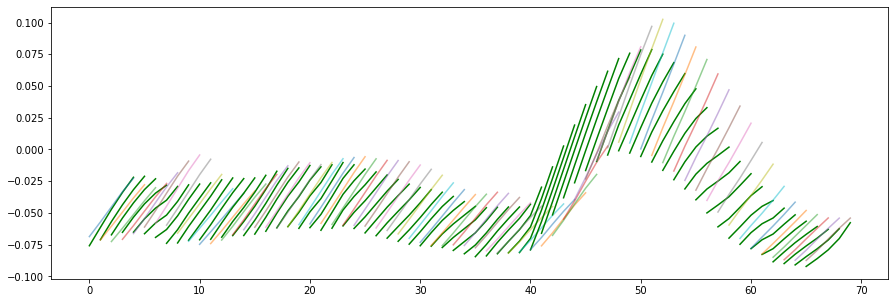

In [89]:
rrr=66
shiftff=66
plotMultVariate(vy[rrr:rrr+shiftff],predictions[rrr:rrr+shiftff],5)
# plotVisual(vy,predictions,lookAhead,0.001)

### RESLSTM

In [156]:
def RESLSTM(shape, activation='elu',hidden=32,singleshot=False):
    if singleshot: outputSize=1
    else: outputSize=lookAhead
    x = Input(shape=shape)
    y = LSTM(hidden,activation, return_sequences=False)(x)
    D = Dropout(0.2)(y)
    D = Dense(period, activation)(y)
    D = Add()([x, D])
    D = Flatten()(D)
    D = Dense(outputSize)(D)
    out = Reshape([outputSize, 1])(D)
    return tf.keras.models.Model(inputs=x, outputs=out)
singleshot=False
model = RESLSTM((period,1),'elu',32,singleshot)
history=compileFit(model,loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),epochs=400,shuffle=True,batch_size=500,patience=30,singleshot=singleshot)
model.summary()
# model.save("RESLSTM")
# model=tf.keras.models.load_model('RESLSTM')
# tf.keras.utils.plot_model(model)

Epoch 1/400
21/21 [==============================] - 2s 31ms/step - loss: 0.0233 - val_loss: 0.0012
Epoch 2/400
21/21 [==============================] - 0s 21ms/step - loss: 0.0027 - val_loss: 7.7756e-04
Epoch 3/400
21/21 [==============================] - 0s 20ms/step - loss: 0.0018 - val_loss: 6.3000e-04
Epoch 4/400
21/21 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 5.6784e-04
Epoch 5/400
21/21 [==============================] - 0s 20ms/step - loss: 0.0013 - val_loss: 5.1547e-04
Epoch 6/400
21/21 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 5.0886e-04
Epoch 7/400
21/21 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 4.8044e-04
Epoch 8/400
14/21 [===================>..........] - ETA: 0s - loss: 0.0011 

KeyboardInterrupt: 

In [ ]:
plotCompare(history.history['loss'],history.history['val_loss'],["Train","Val"])

In [ ]:
if singleshot: predictions=StepForwardPredictions(vx=vx,model=model,steps=lookAhead)
else: predictions=model.predict(vx)
plotAndEvaluate(vy,predictions)

In [ ]:
df1=pd.DataFrame(reverseOutputTransform(predictions,vk,logged=False,scaled=True).reshape(-1,lookAhead))
df2=pd.DataFrame(reverseOutputTransform(vy,vk,logged=False,scaled=True).reshape(-1,lookAhead))

In [ ]:
fromN,toN=60,70

In [ ]:
df1.iloc[fromN:toN].plot()
df2.iloc[fromN:toN].plot()
plotAndEvaluate(reverseOutputTransform(vy,vk,logged=False,scaled=True),reverseOutputTransform(predictions,vk,logged=False,scaled=True))

In [ ]:
rrr=66
shiftff=66
plotMultVariate(vy[rrr:rrr+shiftff],predictions[rrr:rrr+shiftff],5)
# plotVisual(vy,predictions,lookAhead,0.001)

### BILSTM

In [284]:
tf.keras.backend.clear_session()
def BILSTM_model(activation='elu',hidden=32,singleshot=False):
    if singleshot: outputSize=1
    else: outputSize=lookAhead
    return Sequential([Bidirectional(LSTM(hidden,activation,return_sequences=True)),
                       Dropout(0.5),
                       Bidirectional(LSTM(hidden, activation)),
                       Dropout(0.5),
                       Dense(outputSize,"linear"),
                       Reshape([outputSize, 1])])
singleshot=True
model=BILSTM_model('elu',100,singleshot)
history=compileFit(model,loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),shuffle=True,batch_size=500,patience=1,singleshot=singleshot)
model.summary()
# model.save("BILSTM_model")
# model=tf.keras.models.load_model('BILSTM_model')


Epoch 1/100
21/21 [==============================] - 7s 119ms/step - loss: 0.0472 - val_loss: 0.0019
Epoch 2/100
21/21 [==============================] - 2s 98ms/step - loss: 0.0040 - val_loss: 2.7776e-04
Epoch 3/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0011 - val_loss: 1.9257e-04
Epoch 4/100
21/21 [==============================] - 2s 98ms/step - loss: 8.2008e-04 - val_loss: 1.6767e-04
Epoch 5/100
21/21 [==============================] - 2s 112ms/step - loss: 7.0287e-04 - val_loss: 1.3936e-04
Epoch 6/100
21/21 [==============================] - 2s 94ms/step - loss: 7.3285e-04 - val_loss: 1.2811e-04
Epoch 7/100
21/21 [==============================] - 2s 105ms/step - loss: 6.1029e-04 - val_loss: 1.2254e-04
Epoch 8/100
21/21 [==============================] - 2s 98ms/step - loss: 5.9247e-04 - val_loss: 1.0336e-04
Epoch 9/100
21/21 [==============================] - 2s 88ms/step - loss: 5.1252e-04 - val_loss: 1.0421e-04
Model: "sequential"
____________________

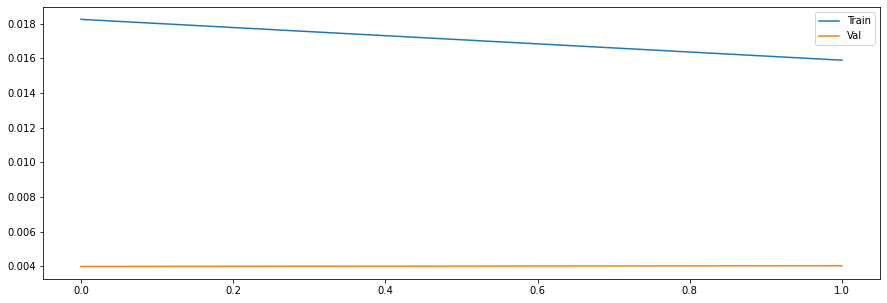

In [167]:
plotCompare(history.history['loss'],history.history['val_loss'],["Train","Val"])

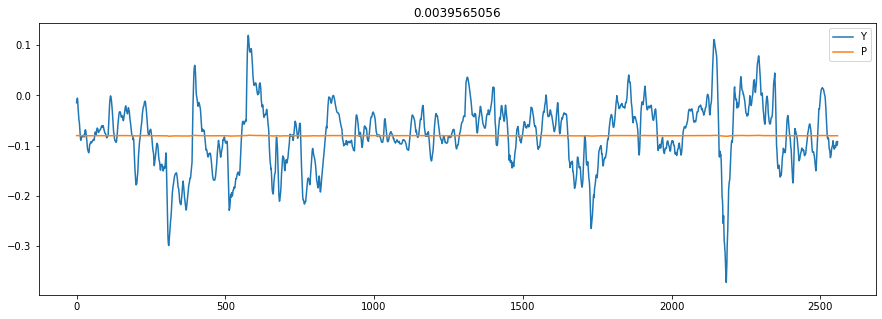

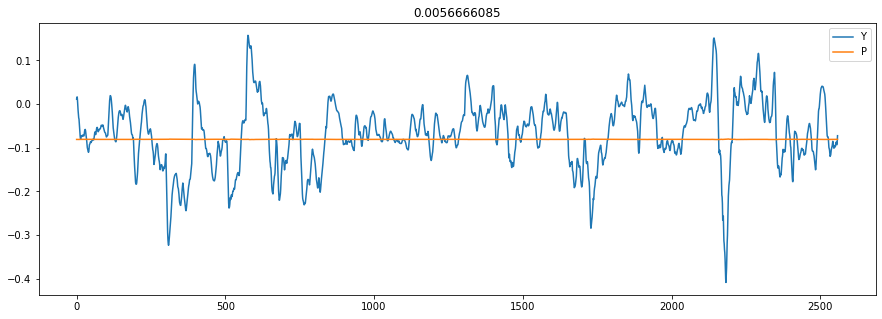

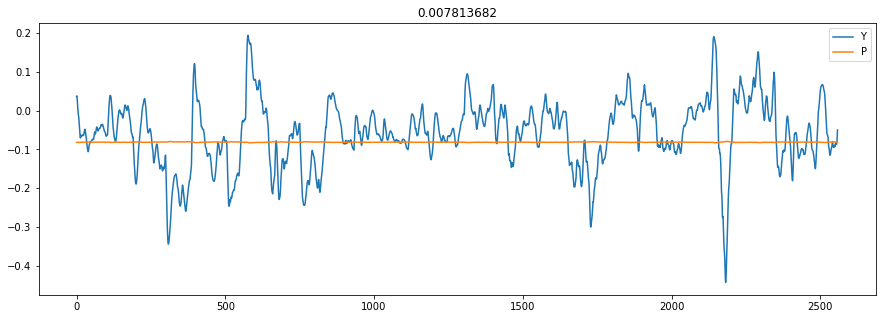

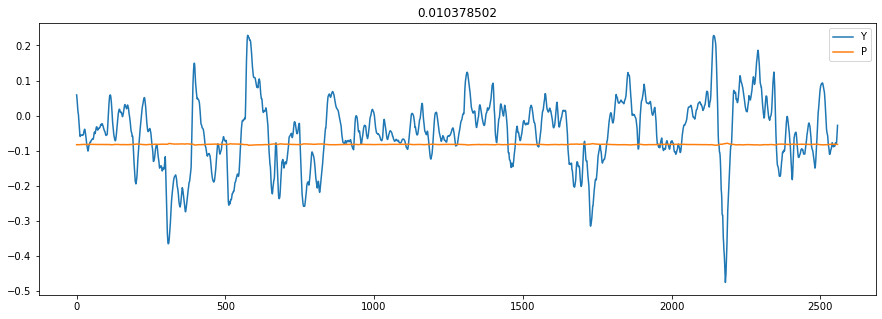

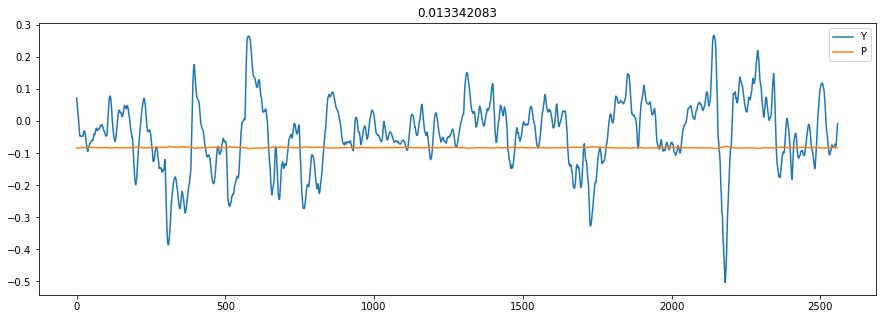

Shape  : (2559, 5, 1)
loss   : 0.00805142056196928
MSE    : 0.007883860600453742 
RMSE   : 0.08879110653918973 
NMSE   : 0.11512160658751748 
DS     : 0.5017982799061766 
WDS    : 0.6506037194181702 
Samples: 2559


In [168]:
if singleshot: predictions=StepForwardPredictions(vx=vx,model=model,steps=lookAhead)
else: predictions=model.predict(vx)
plotAndEvaluate(vy,predictions)

In [169]:
df1=pd.DataFrame(reverseOutputTransform(predictions,vk,logged=False,scaled=True).reshape(-1,lookAhead))
df2=pd.DataFrame(reverseOutputTransform(vy,vk,logged=False,scaled=True).reshape(-1,lookAhead))

In [170]:
fromN,toN=60,70

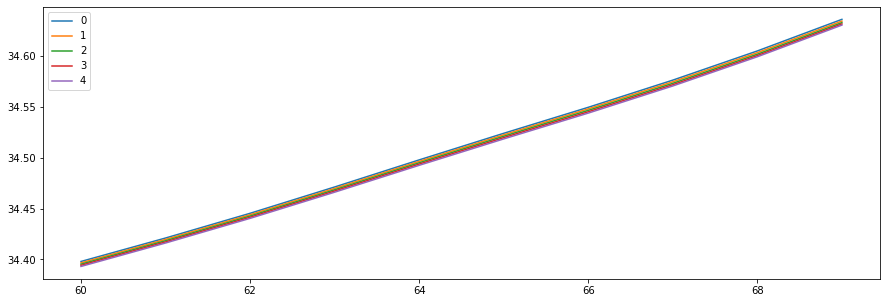

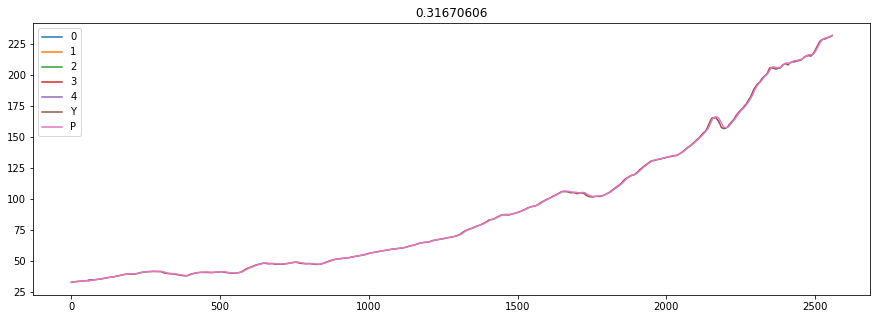

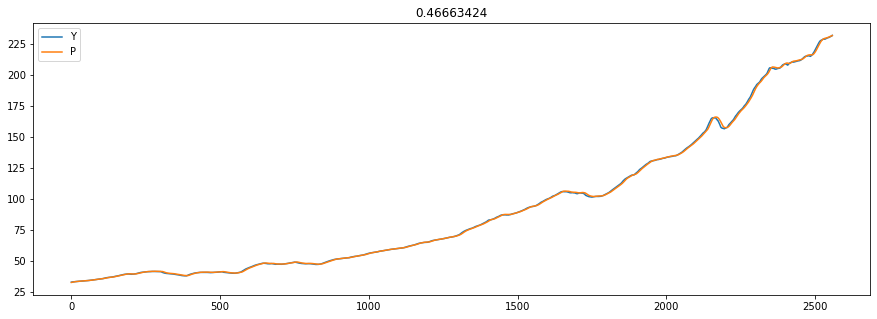

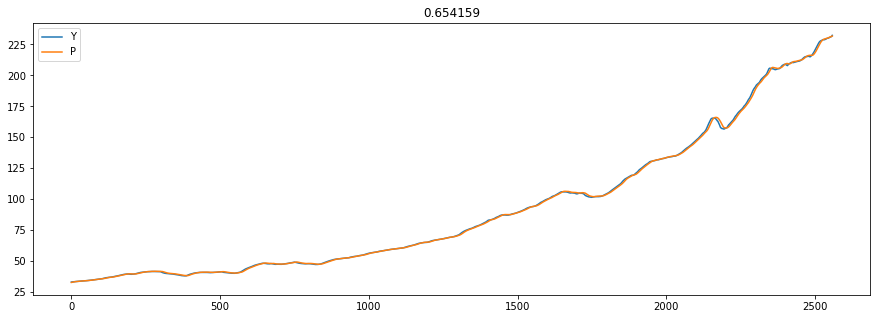

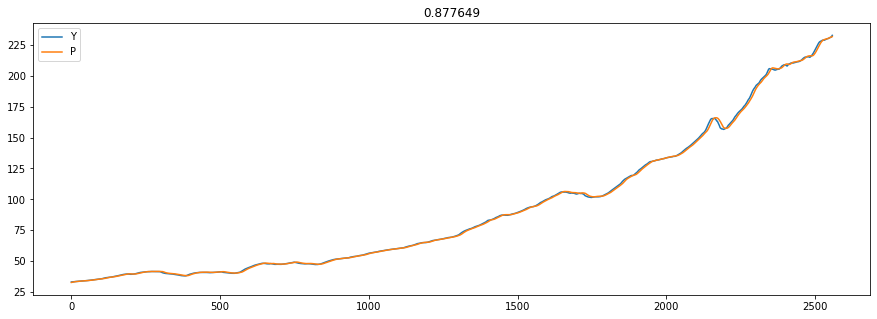

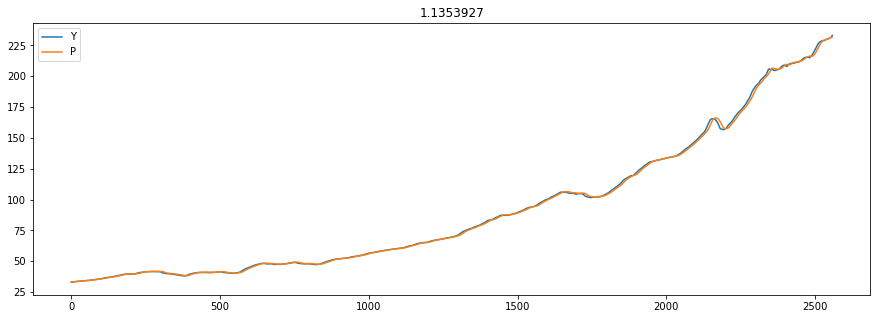

Shape  : (2559, 5, 1)
loss   : 11552.048828125
MSE    : 0.6583868109530098 
RMSE   : 0.8114103838089637 
NMSE   : 0.004053898992395708 
DS     : 0.8926505082095387 
WDS    : 0.004459783936711545 
Samples: 2559


In [171]:
df1.iloc[fromN:toN].plot()
df2.iloc[fromN:toN].plot()
plotAndEvaluate(reverseOutputTransform(vy,vk,logged=False,scaled=True),reverseOutputTransform(predictions,vk,logged=False,scaled=True))

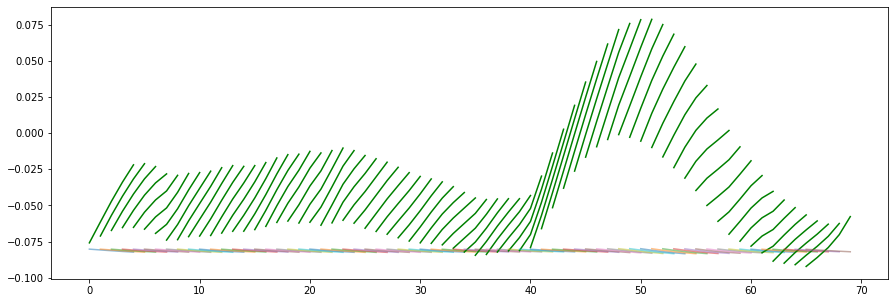

In [172]:
rrr=66
shiftff=66
plotMultVariate(vy[rrr:rrr+shiftff],predictions[rrr:rrr+shiftff],5)
# plotVisual(vy,predictions,lookAhead,0.001)

### ConvLSTM

In [173]:
tf.keras.backend.clear_session()
def CovLSTM_model(activation='elu',hidden=32,singleshot=False):
    if singleshot: outputSize=1
    else: outputSize=lookAhead
    return Sequential([Conv1D(filters=32, kernel_size=5,strides=1,padding="causal",activation=activation),
                       LSTM(hidden,activation,return_sequences=False),
                       Dense(outputSize, activation),
                       Reshape([outputSize, 1])])
singleshot=True
model=CovLSTM_model('elu',100,singleshot)
history=compileFit(model,loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),shuffle=True,batch_size=500,patience=30,singleshot=singleshot)
plotCompare(history.history['loss'],history.history['val_loss'],["train","test"])
# model.save("CovLSTM_model")
# model=tf.keras.models.load_model('CovLSTM_model')

Epoch 1/100
21/21 [==============================] - 3s 47ms/step - loss: 0.0094 - val_loss: 0.0019
Epoch 2/100
21/21 [==============================] - 1s 29ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 3/100
21/21 [==============================] - 1s 30ms/step - loss: 0.0065 - val_loss: 0.0015
Epoch 4/100
19/21 [==========================>...] - ETA: 0s - loss: 0.0055

KeyboardInterrupt: 

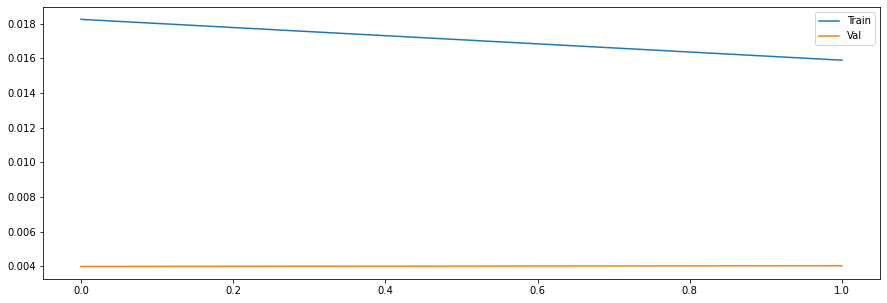

In [174]:
plotCompare(history.history['loss'],history.history['val_loss'],["Train","Val"])

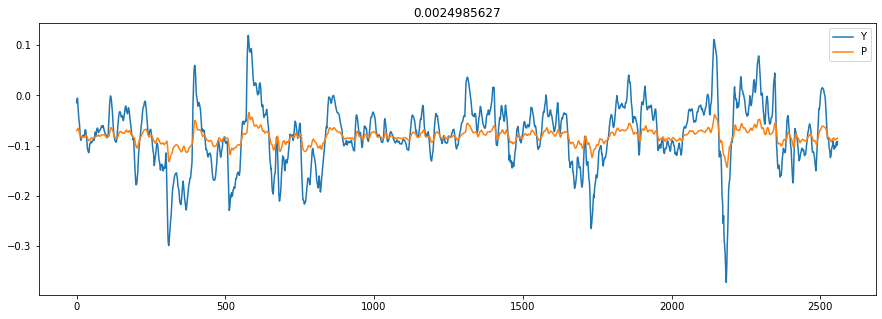

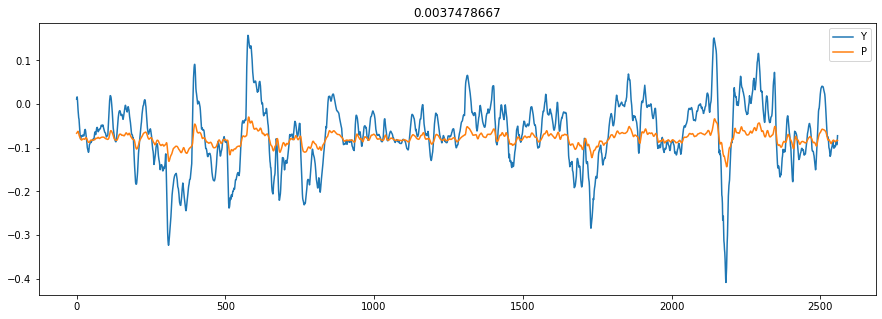

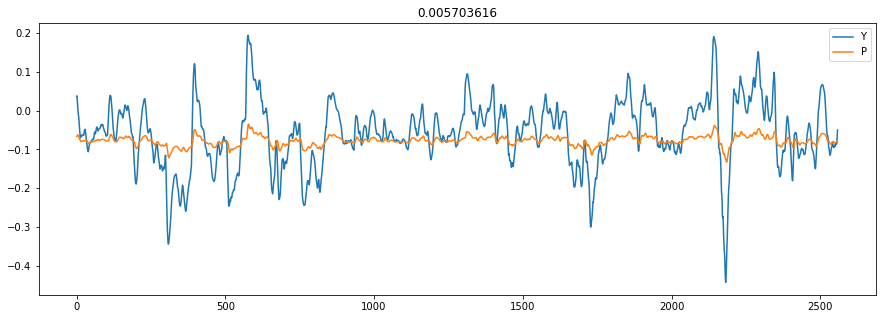

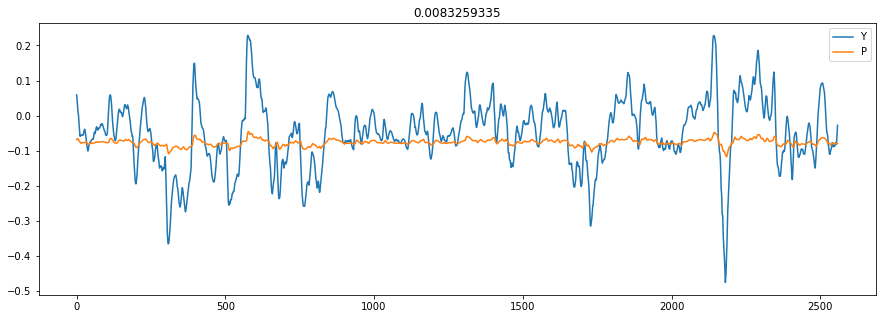

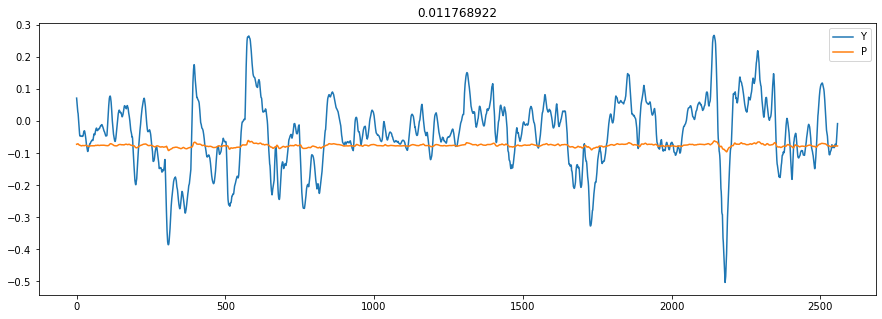

Shape  : (2559, 5, 1)
loss   : 0.00308010121807456
MSE    : 0.005974020598762506 
RMSE   : 0.07729178868911306 
NMSE   : 0.10021223112008765 
DS     : 0.6876465989053948 
WDS    : 0.8915643054351522 
Samples: 2559


In [175]:
if singleshot: predictions=StepForwardPredictions(vx=vx,model=model,steps=lookAhead)
else: predictions=model.predict(vx)
plotAndEvaluate(vy,predictions)

In [176]:
df1=pd.DataFrame(reverseOutputTransform(predictions,vk,logged=False,scaled=True).reshape(-1,lookAhead))
df2=pd.DataFrame(reverseOutputTransform(vy,vk,logged=False,scaled=True).reshape(-1,lookAhead))

In [177]:
fromN,toN=60,70

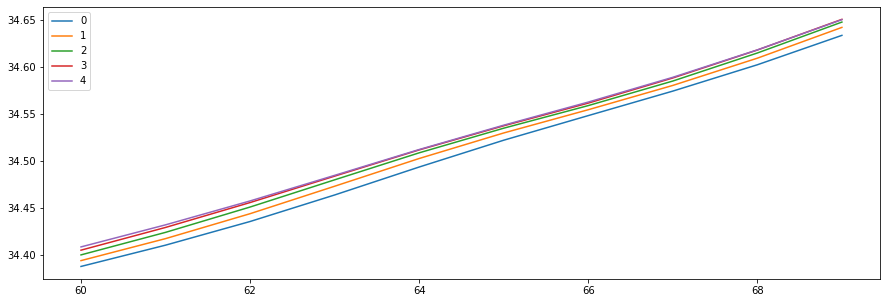

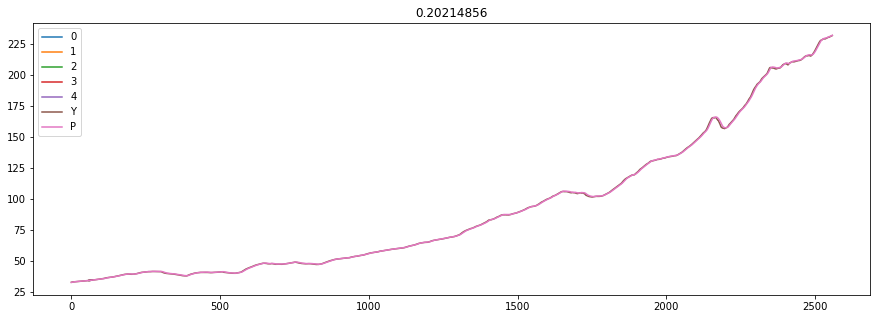

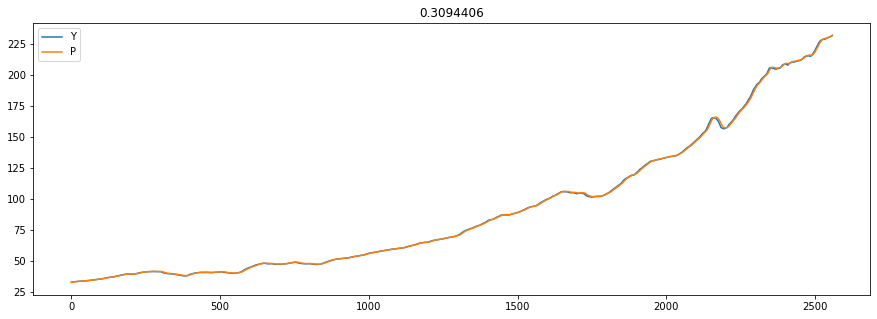

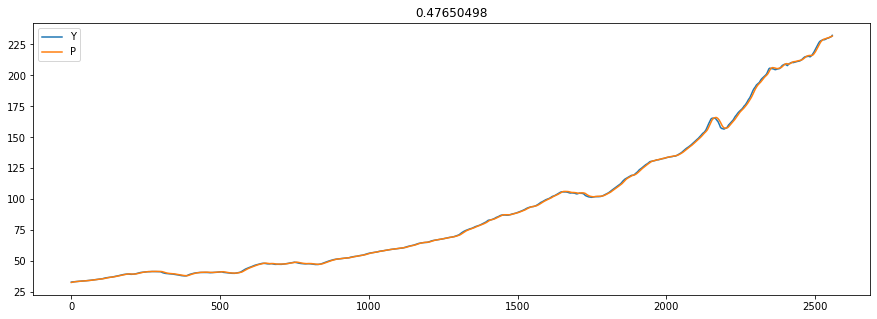

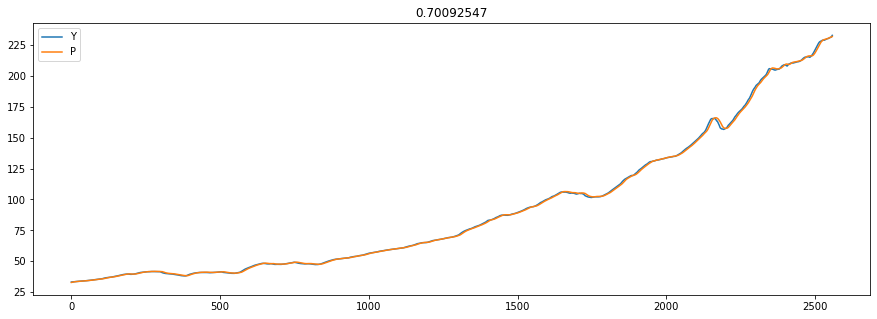

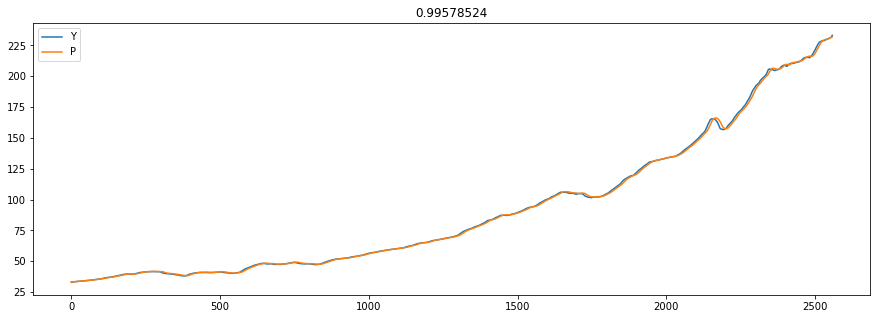

Shape  : (2559, 5, 1)
loss   : 91.33924102783203
MSE    : 0.4987977459162332 
RMSE   : 0.7062561475245601 
NMSE   : 0.0035285364125894245 
DS     : 0.8976544175136826 
WDS    : 0.0044847840393610625 
Samples: 2559


In [178]:
df1.iloc[fromN:toN].plot()
df2.iloc[fromN:toN].plot()
plotAndEvaluate(reverseOutputTransform(vy,vk,logged=False,scaled=True),reverseOutputTransform(predictions,vk,logged=False,scaled=True))

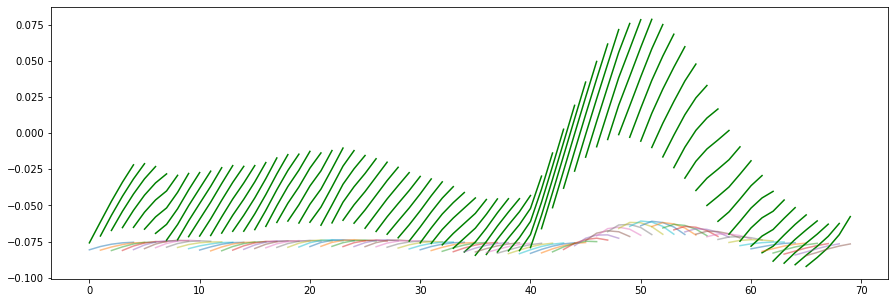

In [179]:
rrr=66
shiftff=66
plotMultVariate(vy[rrr:rrr+shiftff],predictions[rrr:rrr+shiftff],5)
# plotVisual(vy,predictions,lookAhead,0.001)

### DNN

In [278]:
tf.keras.backend.clear_session()
def DNN_model(activation='elu',hidden=512,singleshot=False,dropout=0.5):
    if singleshot: outputSize=1
    else: outputSize=lookAhead
    return Sequential([Dense(hidden, activation),
                        Dropout(dropout),
                        Dense(hidden, activation),
                        Dropout(dropout),
                        Dense(1, activation),
                        Flatten(),
                        Dense(outputSize),
                        Reshape([outputSize,1])])
singleshot=True
model=DNN_model("elu",512,singleshot,0.5)
history=compileFit(model,loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),epochs=10000,batch_size=500,patience=30,singleshot=singleshot)
# model.save("DNN_model")
# model=tf.keras.models.load_model('DNN_model')
# model.summary()

Epoch 1/10000
21/21 [==============================] - 1s 25ms/step - loss: 0.0263 - val_loss: 0.0036
Epoch 2/10000
21/21 [==============================] - 0s 13ms/step - loss: 0.0134 - val_loss: 7.1032e-04
Epoch 3/10000
21/21 [==============================] - 0s 13ms/step - loss: 0.0029 - val_loss: 5.5066e-04
Epoch 4/10000
21/21 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 4.5178e-04
Epoch 5/10000
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 5.5359e-04
Epoch 6/10000
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 4.9499e-04
Epoch 7/10000
21/21 [==============================] - 0s 14ms/step - loss: 0.0013 - val_loss: 3.7551e-04
Epoch 8/10000
21/21 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 3.3242e-04
Epoch 9/10000
21/21 [==============================] - 0s 13ms/step - loss: 9.7251e-04 - val_loss: 2.9217e-04
Epoch 10/10000
21/21 [========================

KeyboardInterrupt: 

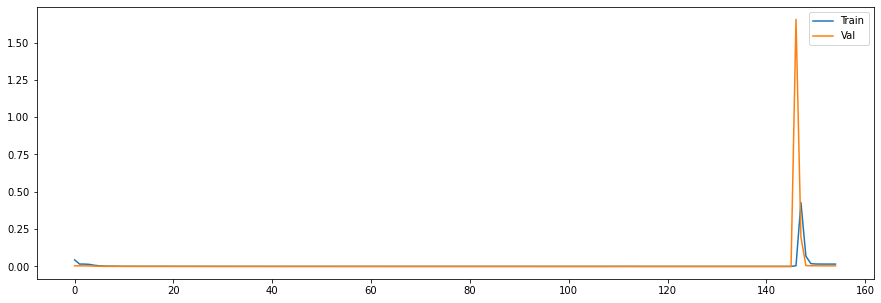

In [279]:
plotCompare(history.history['loss'],history.history['val_loss'],["Train","Val"])

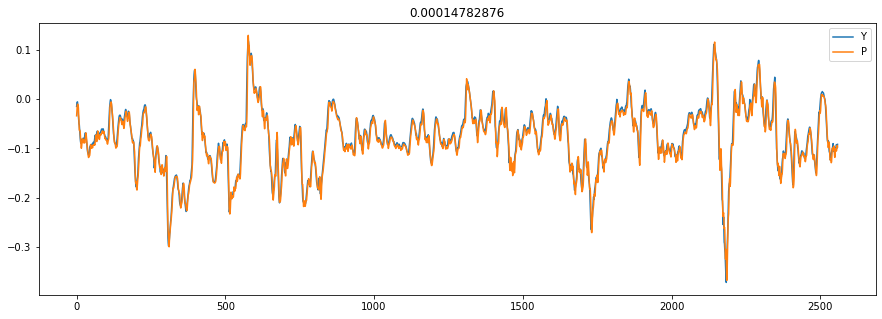

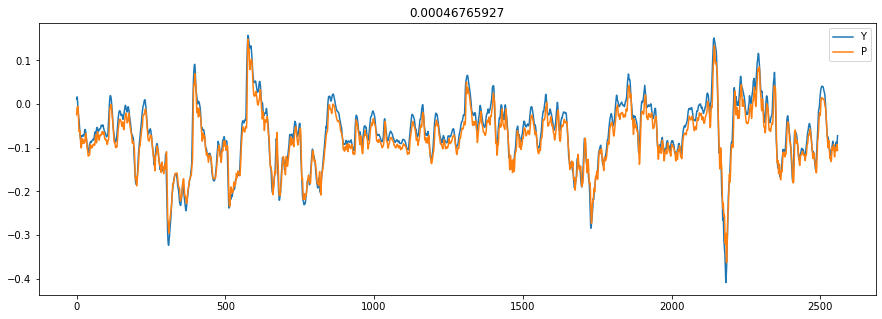

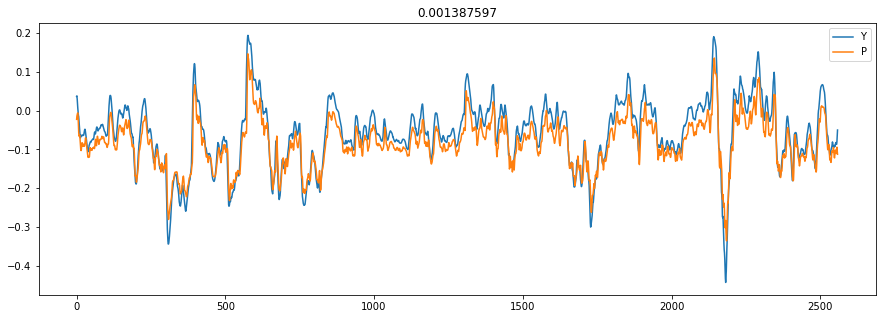

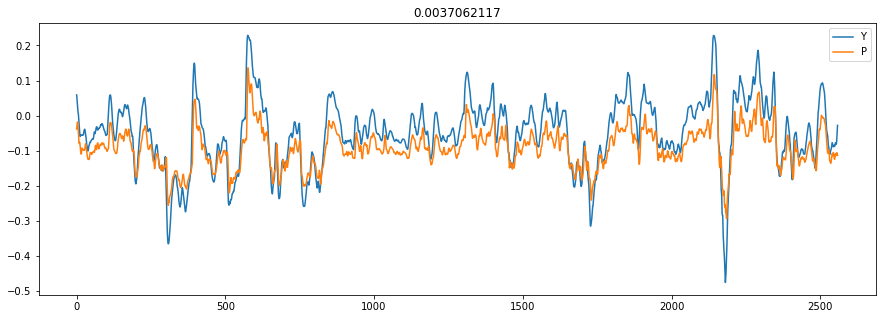

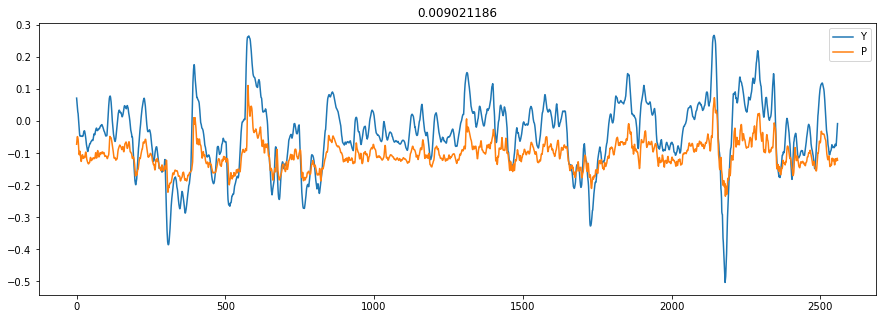

Shape  : (2559, 5, 1)
loss   : 0.00199815072119236
MSE    : 0.002059216696796615 
RMSE   : 0.045378592935398684 
NMSE   : 0.05883535780802918 
DS     : 0.6795152462861611 
WDS    : 0.8810216462236394 
Samples: 2559


In [280]:
if singleshot: predictions=StepForwardPredictions(vx=vx,model=model,steps=lookAhead)
else: predictions=model.predict(vx)
plotAndEvaluate(vy,predictions)

In [195]:
df1=pd.DataFrame(reverseOutputTransform(predictions,vk,logged=False,scaled=True).reshape(-1,lookAhead))
df2=pd.DataFrame(reverseOutputTransform(vy,vk,logged=False,scaled=True).reshape(-1,lookAhead))

In [196]:
fromN,toN=60,70

<AxesSubplot:>

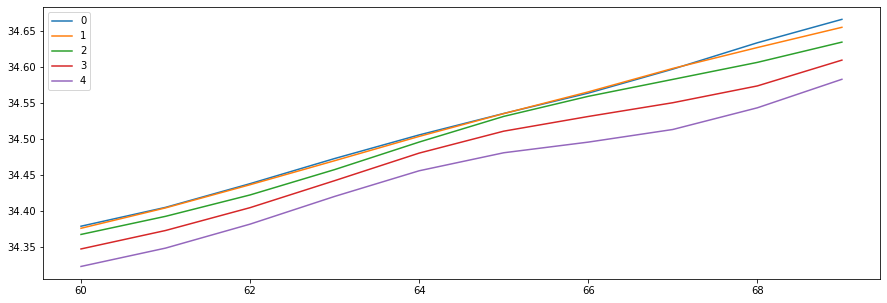

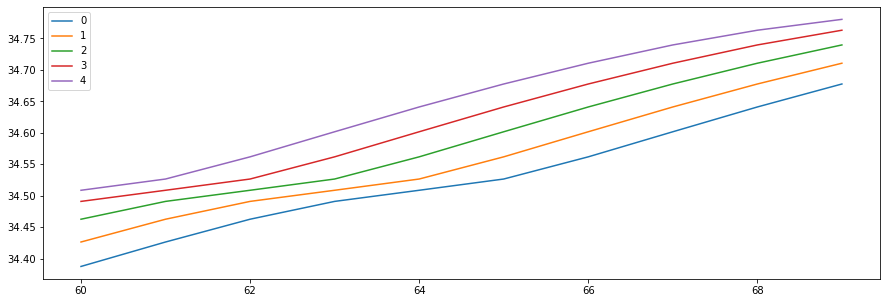

In [199]:
df1.iloc[fromN:toN].plot()
df2.iloc[fromN:toN].plot()

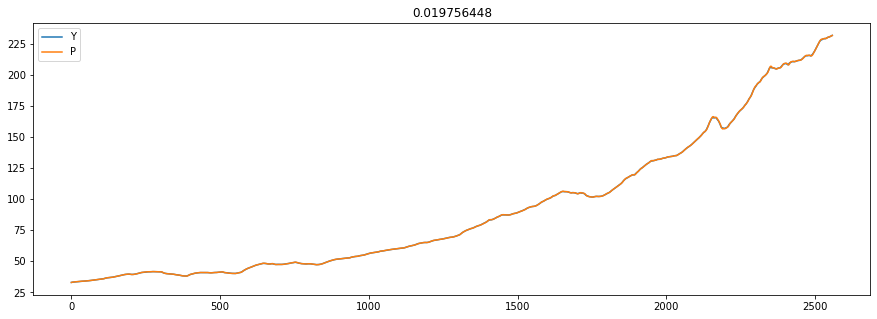

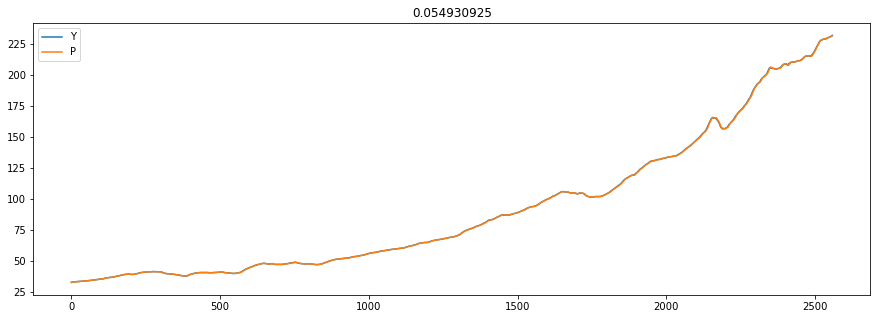

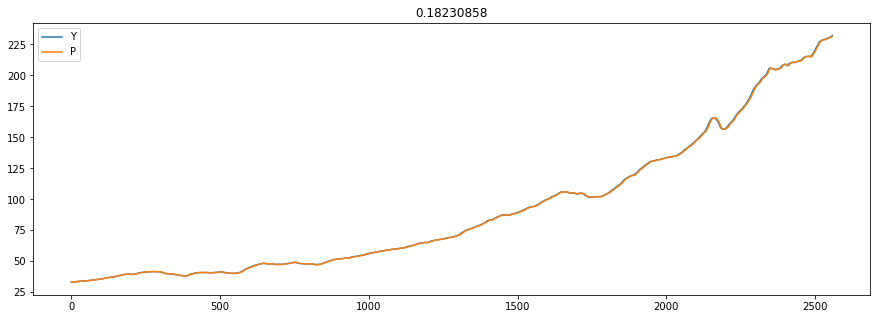

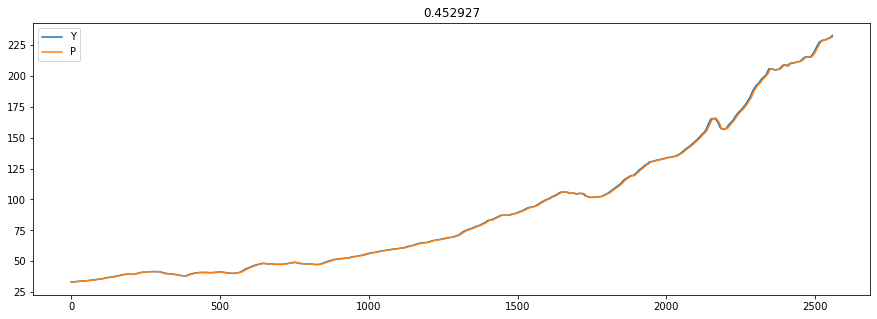

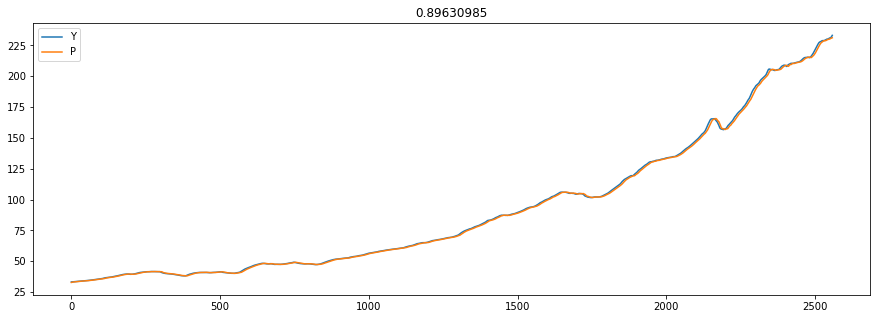

Shape  : (2559, 5, 1)
loss   : 91.33491516113281
MSE    : 0.23457426134642045 
RMSE   : 0.48432867078712205 
NMSE   : 0.0024197613805180596 
DS     : 0.8979671618451915 
WDS    : 0.004486346545776657 
Samples: 2559


In [200]:
plotAndEvaluate(reverseOutputTransform(vy,vk,logged=False,scaled=True),reverseOutputTransform(predictions,vk,logged=False,scaled=True))

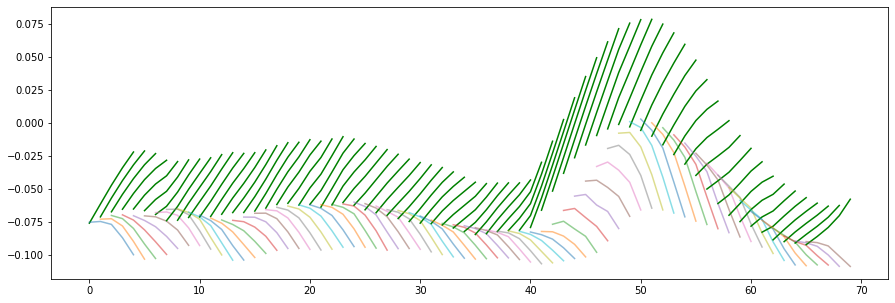

In [201]:
rrr=66
shiftff=66
plotMultVariate(vy[rrr:rrr+shiftff],predictions[rrr:rrr+shiftff],5)
# plotVisual(vy,predictions,lookAhead,0.001)

### Transformer

In [314]:
tf.keras.backend.clear_session()
def Transformer_Encoder_Model(inputShape=(period,1),model_dim=2, hidden=20,encoders=2,key_dim=2,axis=1,dropout=0.2,singleshot=False):
    if singleshot: outputSize=1
    else: outputSize=lookAhead
    x = Input(shape=inputShape)
    Ms= Masking()(x)
    E = ScalerMult(inputShape)(Ms)
    P = PositionalEncoding(inputShape[0], inputShape[1])(E)
    out=Encoder(model_dim,encoders,hidden,P,key_dim,dropout=dropout,axis=axis,epsilon=1e-7)
    out=Flatten()(out)
    out=Dense(outputSize,'elu')(out)
    out=Reshape([outputSize, 1])(out)
    return tf.keras.models.Model(inputs=x,outputs=out) 
singleshot=False
model=Transformer_Encoder_Model(inputShape=trainx.shape[1:],model_dim=trainx.ndim-1, hidden=30,encoders=2,key_dim=2,axis=1,dropout=0.2,singleshot=singleshot)
history =compileFit(model,loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),epochs=10000,batch_size=500,patience=30,singleshot=singleshot)

Epoch 1/10000
21/21 [==============================] - 4s 46ms/step - loss: 1.4736 - val_loss: 1.3877
Epoch 2/10000
21/21 [==============================] - 0s 19ms/step - loss: 1.3505 - val_loss: 1.2576
Epoch 3/10000
21/21 [==============================] - 0s 17ms/step - loss: 1.2256 - val_loss: 1.1394
Epoch 4/10000
21/21 [==============================] - 0s 19ms/step - loss: 1.1210 - val_loss: 1.0319
Epoch 5/10000
21/21 [==============================] - 0s 19ms/step - loss: 1.0249 - val_loss: 0.9343
Epoch 6/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.9411 - val_loss: 0.8452
Epoch 7/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.8492 - val_loss: 0.7641
Epoch 8/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.7817 - val_loss: 0.6899
Epoch 9/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.7087 - val_loss: 0.6219
Epoch 10/10000
21/21 [==============================] - 0s 18ms/step - loss: 0.648

21/21 [==============================] - 0s 17ms/step - loss: 0.0202 - val_loss: 0.0021
Epoch 81/10000
21/21 [==============================] - 0s 14ms/step - loss: 0.0198 - val_loss: 0.0021
Epoch 82/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0192 - val_loss: 0.0020
Epoch 83/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0194 - val_loss: 0.0020
Epoch 84/10000
21/21 [==============================] - 0s 23ms/step - loss: 0.0187 - val_loss: 0.0019
Epoch 85/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0185 - val_loss: 0.0019
Epoch 86/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0183 - val_loss: 0.0019
Epoch 87/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.0180 - val_loss: 0.0019
Epoch 88/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.0175 - val_loss: 0.0019
Epoch 89/10000
21/21 [==============================] - 0s 22ms/step - loss: 0.0173 - va

21/21 [==============================] - 0s 16ms/step - loss: 0.0087 - val_loss: 0.0013
Epoch 160/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0086 - val_loss: 0.0013
Epoch 161/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0085 - val_loss: 0.0013
Epoch 162/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0085 - val_loss: 0.0013
Epoch 163/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.0085 - val_loss: 0.0013
Epoch 164/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0084 - val_loss: 0.0013
Epoch 165/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.0082 - val_loss: 0.0013
Epoch 166/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0082 - val_loss: 0.0013
Epoch 167/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.0081 - val_loss: 0.0013
Epoch 168/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.

Epoch 238/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 239/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 240/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0052 - val_loss: 0.0011
Epoch 241/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 242/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 243/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 244/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 245/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0049 - val_loss: 0.0011
Epoch 246/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 247/10000
21/21 [==============================] - 0s 17ms

21/21 [==============================] - 0s 17ms/step - loss: 0.0035 - val_loss: 9.0216e-04
Epoch 316/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0035 - val_loss: 9.1307e-04
Epoch 317/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0034 - val_loss: 9.0385e-04
Epoch 318/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0033 - val_loss: 8.9739e-04
Epoch 319/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0034 - val_loss: 8.9736e-04
Epoch 320/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0034 - val_loss: 9.0213e-04
Epoch 321/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 8.9176e-04
Epoch 322/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 9.0397e-04
Epoch 323/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0033 - val_loss: 8.7852e-04
Epoch 324/10000
21/21 [=====================

21/21 [==============================] - 0s 20ms/step - loss: 0.0025 - val_loss: 7.4166e-04
Epoch 392/10000
21/21 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 7.4296e-04
Epoch 393/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0024 - val_loss: 7.4346e-04
Epoch 394/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0024 - val_loss: 7.6233e-04
Epoch 395/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.0025 - val_loss: 7.4237e-04
Epoch 396/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 7.4959e-04
Epoch 397/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0024 - val_loss: 7.4506e-04
Epoch 398/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0024 - val_loss: 7.5147e-04
Epoch 399/10000
21/21 [==============================] - 0s 22ms/step - loss: 0.0024 - val_loss: 7.3793e-04
Epoch 400/10000
21/21 [=====================

21/21 [==============================] - 0s 20ms/step - loss: 0.0018 - val_loss: 6.1927e-04
Epoch 468/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 6.2318e-04
Epoch 469/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0019 - val_loss: 6.2077e-04
Epoch 470/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0018 - val_loss: 6.1709e-04
Epoch 471/10000
21/21 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 6.2219e-04
Epoch 472/10000
21/21 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss: 6.2063e-04
Epoch 473/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0018 - val_loss: 6.1418e-04
Epoch 474/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0018 - val_loss: 6.2155e-04
Epoch 475/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.0018 - val_loss: 6.1415e-04
Epoch 476/10000
21/21 [=====================

21/21 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 5.3305e-04
Epoch 544/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 5.2700e-04
Epoch 545/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0014 - val_loss: 5.2663e-04
Epoch 546/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.0014 - val_loss: 5.3533e-04
Epoch 547/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 5.2145e-04
Epoch 548/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 5.2428e-04
Epoch 549/10000
21/21 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 5.3966e-04
Epoch 550/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0015 - val_loss: 5.2151e-04
Epoch 551/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0014 - val_loss: 5.2728e-04
Epoch 552/10000
21/21 [=====================

21/21 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 4.6756e-04
Epoch 620/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0012 - val_loss: 4.5746e-04
Epoch 621/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 4.5924e-04
Epoch 622/10000
21/21 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 4.6135e-04
Epoch 623/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 4.5981e-04
Epoch 624/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 4.6200e-04
Epoch 625/10000
21/21 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 4.6145e-04
Epoch 626/10000
21/21 [==============================] - 0s 23ms/step - loss: 0.0012 - val_loss: 4.6604e-04
Epoch 627/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 4.5695e-04
Epoch 628/10000
21/21 [=====================

21/21 [==============================] - 0s 20ms/step - loss: 0.0010 - val_loss: 4.1539e-04
Epoch 696/10000
21/21 [==============================] - 0s 17ms/step - loss: 9.9593e-04 - val_loss: 4.1612e-04
Epoch 697/10000
21/21 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 4.1616e-04
Epoch 698/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.0010 - val_loss: 4.3031e-04
Epoch 699/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 4.1286e-04
Epoch 700/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 4.1716e-04
Epoch 701/10000
21/21 [==============================] - 0s 13ms/step - loss: 0.0010 - val_loss: 4.1630e-04
Epoch 702/10000
21/21 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 4.0952e-04
Epoch 703/10000
21/21 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 4.1165e-04
Epoch 704/10000
21/21 [=================

21/21 [==============================] - 0s 16ms/step - loss: 9.8523e-04 - val_loss: 3.8632e-04
Epoch 770/10000
21/21 [==============================] - 0s 15ms/step - loss: 9.5501e-04 - val_loss: 3.9191e-04
Epoch 771/10000
21/21 [==============================] - 0s 21ms/step - loss: 9.6919e-04 - val_loss: 3.8703e-04
Epoch 772/10000
21/21 [==============================] - 0s 21ms/step - loss: 9.5052e-04 - val_loss: 3.8887e-04
Epoch 773/10000
21/21 [==============================] - 0s 19ms/step - loss: 9.6303e-04 - val_loss: 3.8745e-04
Epoch 774/10000
21/21 [==============================] - 0s 17ms/step - loss: 9.6503e-04 - val_loss: 3.8400e-04
Epoch 775/10000
21/21 [==============================] - 0s 19ms/step - loss: 9.6557e-04 - val_loss: 3.8739e-04
Epoch 776/10000
21/21 [==============================] - 0s 20ms/step - loss: 9.3930e-04 - val_loss: 3.8996e-04
Epoch 777/10000
21/21 [==============================] - 1s 27ms/step - loss: 9.5006e-04 - val_loss: 3.8584e-04
Epoch 77

21/21 [==============================] - 1s 26ms/step - loss: 9.1523e-04 - val_loss: 3.7637e-04
Epoch 843/10000
21/21 [==============================] - 0s 24ms/step - loss: 8.9610e-04 - val_loss: 3.7352e-04
Epoch 844/10000
21/21 [==============================] - 0s 20ms/step - loss: 9.2060e-04 - val_loss: 3.7372e-04
Epoch 845/10000
21/21 [==============================] - 0s 23ms/step - loss: 8.9708e-04 - val_loss: 3.7551e-04
Epoch 846/10000
21/21 [==============================] - 0s 22ms/step - loss: 9.0267e-04 - val_loss: 3.7674e-04
Epoch 847/10000
21/21 [==============================] - 0s 20ms/step - loss: 8.9503e-04 - val_loss: 3.7415e-04
Epoch 848/10000
21/21 [==============================] - 1s 26ms/step - loss: 9.0960e-04 - val_loss: 3.7731e-04
Epoch 849/10000
21/21 [==============================] - 1s 26ms/step - loss: 9.7344e-04 - val_loss: 3.7373e-04
Epoch 850/10000
21/21 [==============================] - 0s 20ms/step - loss: 9.2186e-04 - val_loss: 3.7232e-04
Epoch 85

21/21 [==============================] - 1s 27ms/step - loss: 8.6889e-04 - val_loss: 3.6671e-04
Epoch 916/10000
21/21 [==============================] - 0s 24ms/step - loss: 8.7974e-04 - val_loss: 3.6745e-04
Epoch 917/10000
21/21 [==============================] - 0s 22ms/step - loss: 8.5554e-04 - val_loss: 3.6857e-04
Epoch 918/10000
21/21 [==============================] - 0s 24ms/step - loss: 9.0196e-04 - val_loss: 3.6802e-04
Epoch 919/10000
21/21 [==============================] - 0s 23ms/step - loss: 8.8682e-04 - val_loss: 3.6899e-04
Epoch 920/10000
21/21 [==============================] - 0s 19ms/step - loss: 8.8783e-04 - val_loss: 3.6887e-04
Epoch 921/10000
21/21 [==============================] - 0s 24ms/step - loss: 8.5895e-04 - val_loss: 3.6741e-04
Epoch 922/10000
21/21 [==============================] - 0s 24ms/step - loss: 8.3418e-04 - val_loss: 3.6586e-04
Epoch 923/10000
21/21 [==============================] - 0s 20ms/step - loss: 9.0441e-04 - val_loss: 3.7338e-04
Epoch 92

21/21 [==============================] - 0s 18ms/step - loss: 8.6667e-04 - val_loss: 3.6405e-04
Epoch 989/10000
21/21 [==============================] - 0s 17ms/step - loss: 8.7346e-04 - val_loss: 3.6187e-04
Epoch 990/10000
21/21 [==============================] - 0s 19ms/step - loss: 8.7618e-04 - val_loss: 3.6419e-04
Epoch 991/10000
21/21 [==============================] - 0s 15ms/step - loss: 8.2769e-04 - val_loss: 3.6270e-04
Epoch 992/10000
21/21 [==============================] - 0s 20ms/step - loss: 8.7205e-04 - val_loss: 3.6354e-04
Epoch 993/10000
21/21 [==============================] - 0s 20ms/step - loss: 8.8925e-04 - val_loss: 3.6555e-04
Epoch 994/10000
21/21 [==============================] - 0s 16ms/step - loss: 8.6230e-04 - val_loss: 3.6819e-04
Epoch 995/10000
21/21 [==============================] - 0s 18ms/step - loss: 8.1606e-04 - val_loss: 3.6381e-04
Epoch 996/10000
21/21 [==============================] - 0s 16ms/step - loss: 8.8787e-04 - val_loss: 3.6434e-04
Epoch 99

Epoch 1061/10000
21/21 [==============================] - 0s 16ms/step - loss: 8.2113e-04 - val_loss: 3.6285e-04
Epoch 1062/10000
21/21 [==============================] - 0s 16ms/step - loss: 8.4458e-04 - val_loss: 3.6119e-04
Epoch 1063/10000
21/21 [==============================] - 0s 19ms/step - loss: 8.4790e-04 - val_loss: 3.6556e-04
Epoch 1064/10000
21/21 [==============================] - 0s 20ms/step - loss: 8.6419e-04 - val_loss: 3.6084e-04
Epoch 1065/10000
21/21 [==============================] - 0s 20ms/step - loss: 8.4138e-04 - val_loss: 3.6188e-04
Epoch 1066/10000
21/21 [==============================] - 0s 16ms/step - loss: 8.6934e-04 - val_loss: 3.5984e-04
Epoch 1067/10000
21/21 [==============================] - 0s 15ms/step - loss: 8.7491e-04 - val_loss: 3.6139e-04
Epoch 1068/10000
21/21 [==============================] - 0s 18ms/step - loss: 8.3633e-04 - val_loss: 3.6232e-04
Epoch 1069/10000
21/21 [==============================] - 0s 23ms/step - loss: 8.4154e-04 - val_

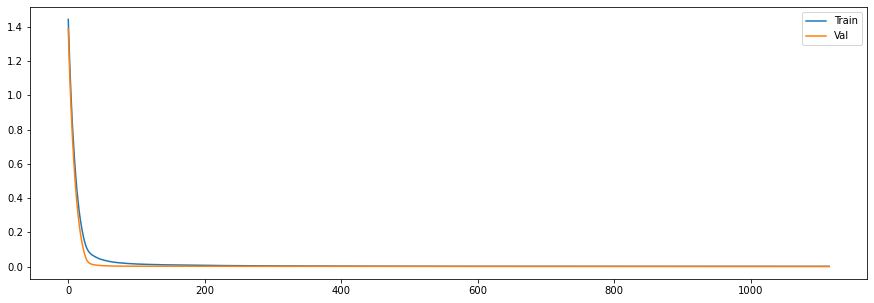

In [316]:
plotCompare(history.history['loss'],history.history['val_loss'],["Train","Val"])

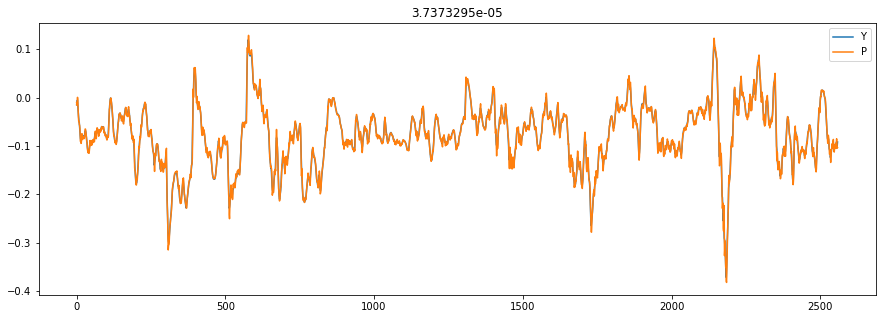

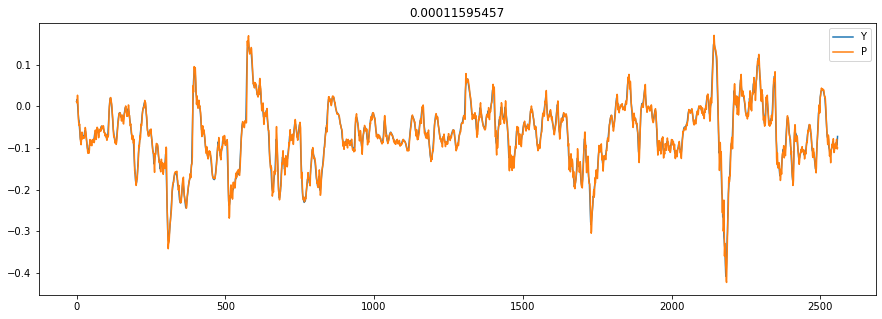

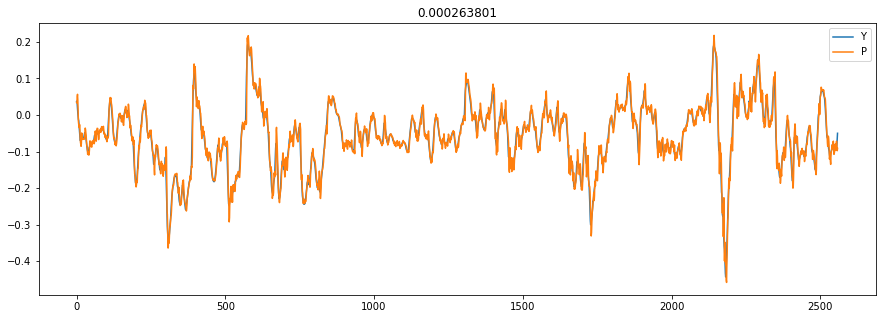

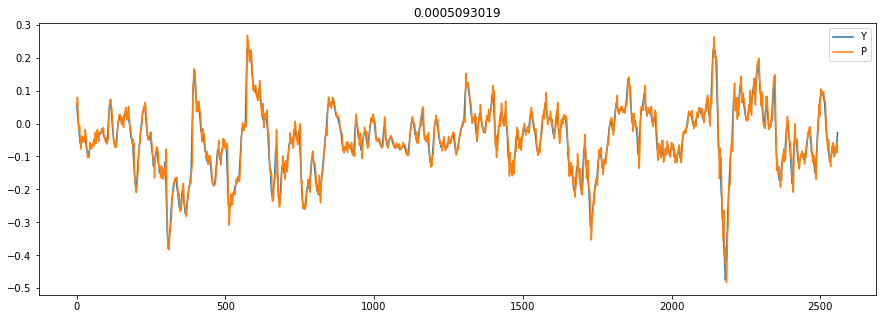

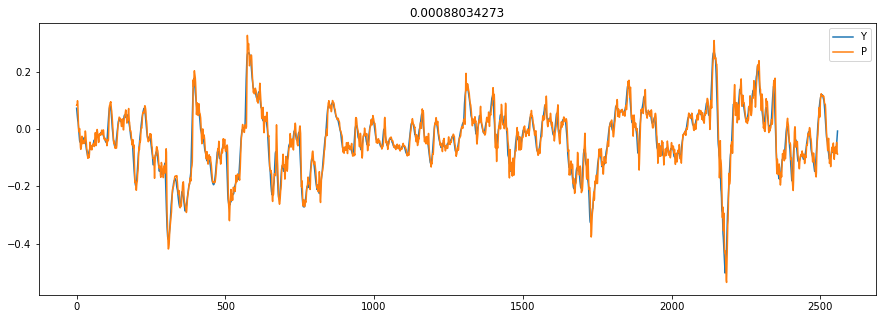

Shape  : (2559, 5, 1)
loss   : 0.00036135470145381987
MSE    : 0.0002914656779291295 
RMSE   : 0.017072365914808922 
NMSE   : 0.022135079389908358 
DS     : 0.6811571540265833 
WDS    : 0.8831504524105794 
Samples: 2559


In [317]:
if singleshot: predictions=StepForwardPredictions(vx=vx,model=model,steps=lookAhead)
else: predictions=model.predict(vx)
plotAndEvaluate(vy,predictions)

In [318]:
df1=pd.DataFrame(reverseOutputTransform(predictions,vk,logged=False,scaled=True).reshape(-1,lookAhead))
df2=pd.DataFrame(reverseOutputTransform(vy,vk,logged=False,scaled=True).reshape(-1,lookAhead))

In [319]:
fromN,toN=60,70

<AxesSubplot:>

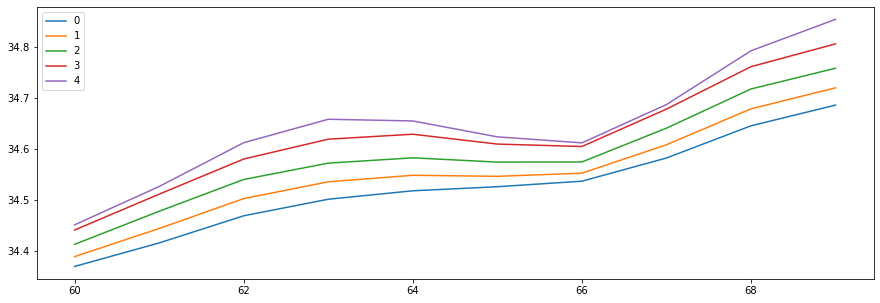

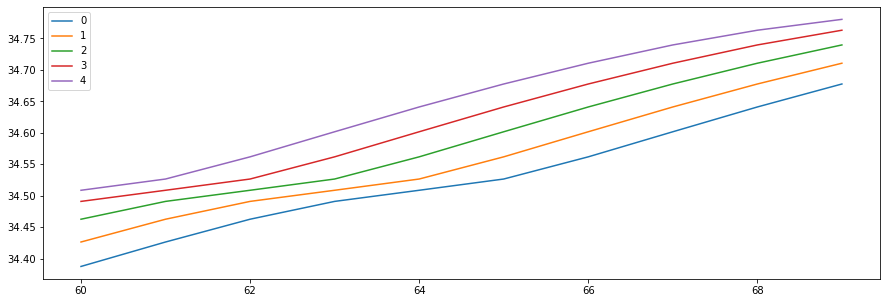

In [320]:
df1.iloc[fromN:toN].plot()
df2.iloc[fromN:toN].plot()

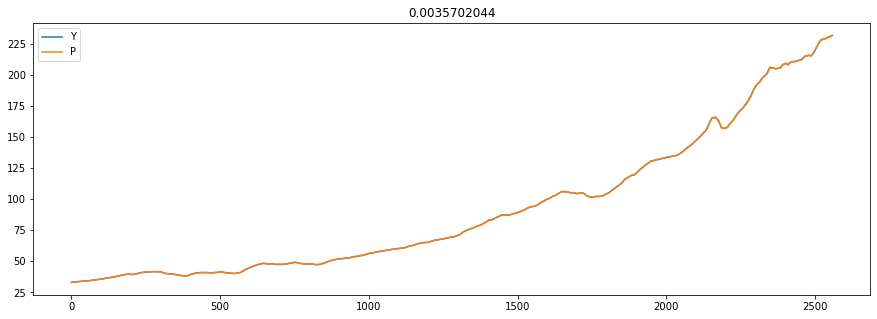

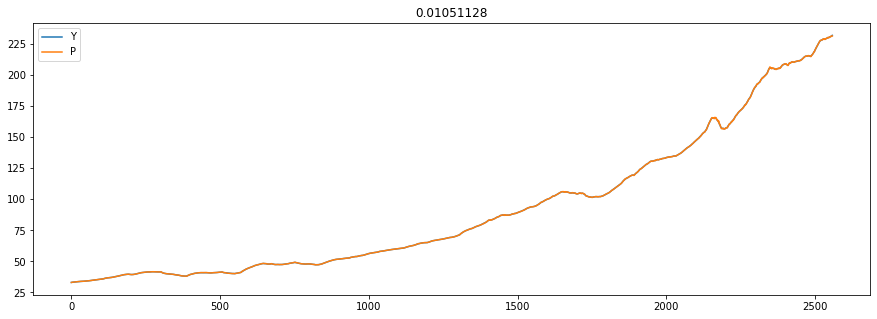

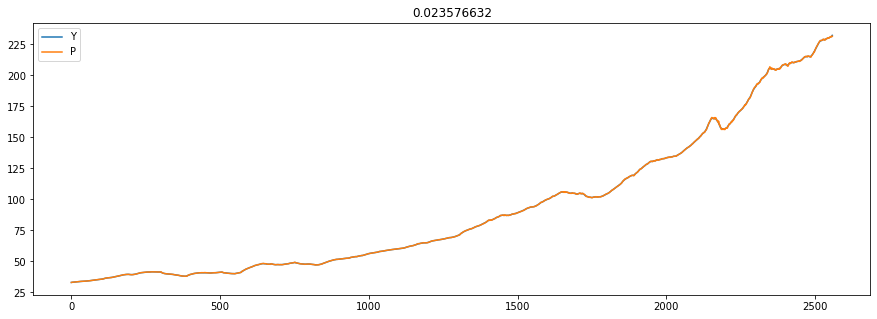

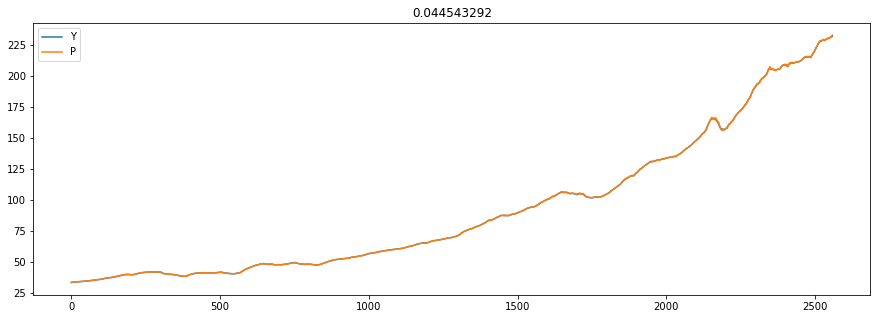

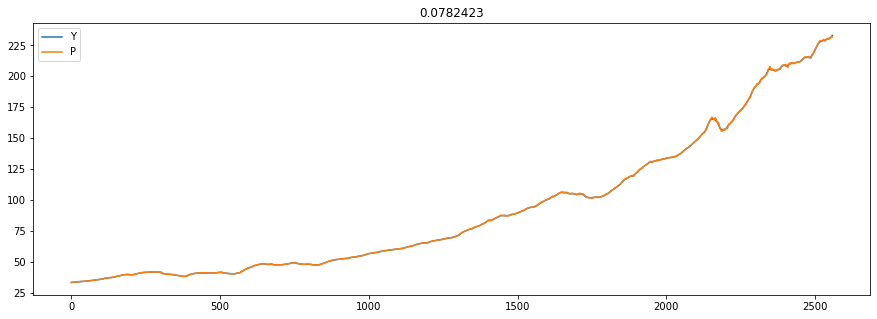

Shape  : (2559, 5, 1)
loss   : 11546.501953125
MSE    : 0.026023790727234365 
RMSE   : 0.16131891001130141 
NMSE   : 0.0008059677073385319 
DS     : 0.8364347146207975 
WDS    : 0.004178923408508374 
Samples: 2559


In [321]:
plotAndEvaluate(reverseOutputTransform(vy,vk,logged=False,scaled=True),reverseOutputTransform(predictions,vk,logged=False,scaled=True))

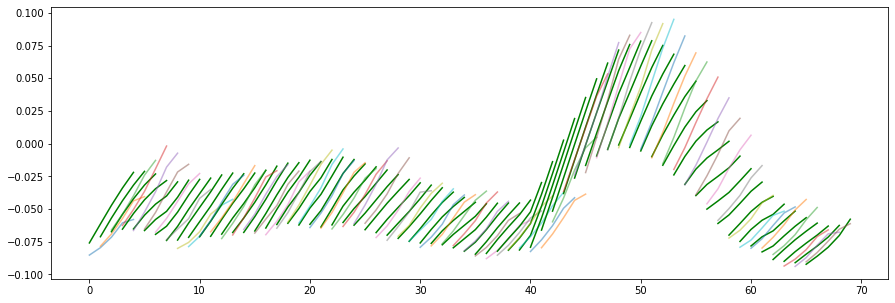

In [322]:
rrr=66
shiftff=66
plotMultVariate(vy[rrr:rrr+shiftff],predictions[rrr:rrr+shiftff],lookAhead)
# plotVisual(vy,predictions,lookAhead,0.001)

# Applying Sentiment to our models 

In [271]:
# insterDFToDB("processedSentiment140",sentiment140Value[["_id","SentimentScore","processed"]])

In [272]:
tweetdata

NameError: name 'tweetdata' is not defined

In [59]:
pss=pd.DataFrame(tweetdata["body"][tweetdata["body"].str.contains("tsla|tesla", case=False, flags=0, na=None, regex=True)].apply(preprocess))
pss=pss.drop_duplicates(subset=['body'], keep='last')
pss=pss.sample(frac=1)

In [67]:
pss["2015"].

KeyError: '2015'

In [64]:
pss.resample('D').first()
# data["wasNa"]=data['Close'].isna()#mark filled in spots for future reference
# print(data["wasNa"].value_counts())

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [73]:
model = Pipeline([
        ('bow', CountVectorizer(max_features=300000,preprocessor=preprocess,ngram_range=(1,2),lowercase=False)),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])
    
model.fit(trainX.values, trainY[original3].values.flatten())
pred=model.predict(testX.values)
print(confusion_matrix(testY[original3].values,pred))
print(classification_report(testY[original3].values,pred))

[[125263  29085]
 [ 31272 120911]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81    154348
           2       0.81      0.79      0.80    152183

    accuracy                           0.80    306531
   macro avg       0.80      0.80      0.80    306531
weighted avg       0.80      0.80      0.80    306531



In [75]:
pss

,body,sentiment
post_date,,
2016-04-15,crmd reviews updated friday april NUMBERTAG...,2
2019-01-11,service king in texas listed online as tesla ...,2
2018-09-13,indeed have warned investors to secure their ...,2
2017-07-06,HASHTAG shares down more than NUMBERTAG t...,2
2019-08-12,NUMBERTAG for pharma they label things as ...,2
...,...,...
2018-03-30,t securities lc purchases NUMBERTAG shares...,2
2017-12-22,HASHTAG subsidiary esteq investment and key...,2
2018-11-19,tfw you wake up with bad flu and someone tells...,-1


In [62]:
pss["sentiment"]=model.predict(pss["body"].values)

In [84]:
pss["sentiment"]=pss["sentiment"].replace({0:-1,2:1})

In [85]:
# pss.set_index(pd.to_datetime(pss.index, unit='d',utc=True).dt.date)

In [86]:
# TSLA=load("TSLA")
# TSLA=loadStockData(stock)
print(tweetdata.index.min(), tweetdata.index.max())
print(TSLA.index.min(), TSLA.index.max())
mini,maxi=None,None
if tweetdata.index.min()>TSLA.index.min(): mini=tweetdata.index.min()
else: mini= TSLA.index.min()
if tweetdata.index.max()>TSLA.index.max(): mini=TSLA.index.max()
else: maxi= tweetdata.index.max()
print(mini,"-",maxi)

2015-01-01 2019-12-31
2010-06-29 00:00:00 2021-03-31 00:00:00
2015-01-01 - 2019-12-31


In [4]:
# check if stock has relationship with sentiment
# check if sentiment compenent works well
# check if sentiment compenent improves stock predictions 
# check if fill in and check missing data in time series problems
# check how roll calculates missing values 

In [87]:
pss

,body,sentiment
post_date,,
2016-04-15,crmd reviews updated friday april NUMBERTAG...,1
2019-01-11,service king in texas listed online as tesla ...,1
2018-09-13,indeed have warned investors to secure their ...,1
2017-07-06,HASHTAG shares down more than NUMBERTAG t...,1
2019-08-12,NUMBERTAG for pharma they label things as ...,1
...,...,...
2018-03-30,t securities lc purchases NUMBERTAG shares...,1
2017-12-22,HASHTAG subsidiary esteq investment and key...,1
2018-11-19,tfw you wake up with bad flu and someone tells...,-1


In [72]:
# tslaTweets=tweetdata[tweetdata["body"].str.contains("tsla|tesla", case=False, na=None, regex=True)]
# tslaTweets["sentiment"]=model.predict(tslaTweets["body"])
# tslaTweets["good"],tslaTweets["bad"]=tslaTweets["sentiment"].apply(lambda x: x==4 and 1 or 0),tslaTweets["sentiment"].apply(lambda x: x==0 and 1 or 0)
# tslaTweets=tslaTweets.groupby(tslaTweets.index).sum()
# tslaTweets=tslaTweets.set_index(pd.to_datetime(tslaTweets.index))

<ipython-input-72-fedfca0b24ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tslaTweets["sentiment"]=model.predict(tslaTweets["body"])
<ipython-input-72-fedfca0b24ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tslaTweets["good"],tslaTweets["bad"]=tslaTweets["sentiment"].apply(lambda x: x==4 and 1 or 0),tslaTweets["sentiment"].apply(lambda x: x==0 and 1 or 0)


In [90]:
pss["good"],pss["bad"]=pss["sentiment"].apply(lambda x: x==1 and 1 or 0),pss["sentiment"].apply(lambda x: x==-1 and 1 or 0)
pss=pss.groupby(pss.index).sum()
pss=pss.set_index(pd.to_datetime(pss.index))
pss

,sentiment,good,bad
post_date,,,
2015-01-01,30,47,17
2015-01-02,38,99,61
2015-01-03,24,48,24
2015-01-04,24,56,32
2015-01-05,89,153,64
...,...,...,...
2019-12-27,378,821,443
2019-12-28,180,388,208
2019-12-29,149,372,223


In [129]:
pss["diff"]=pss["good"]-pss["bad"]
pss["str"]=pss["diff"]/(pss["good"]+pss["bad"])
pss["sign"]=np.sign(pss["diff"])
pss["change"]=(pss["diff"]-pss["diff"].shift(1)).fillna(0)
pss["changeS"]=np.sign(pss["change"])
pss=pss.resample('D').first()
pss=pss.ffill()

In [9]:
# tslaTweets
# findMissingInterval(tslaTweets)

In [10]:
# slices.drop(columns=['sentiment'], inplace=True)
tslaTweets["diff"]=tslaTweets["good"]-tslaTweets["bad"]
tslaTweets["str"]=tslaTweets["diff"]/(tslaTweets["good"]+tslaTweets["bad"])
tslaTweets["sign"]=np.sign(tslaTweets["diff"])
tslaTweets["change"]=(tslaTweets["diff"]-tslaTweets["diff"].shift(1)).fillna(0)
tslaTweets["changeS"]=np.sign(tslaTweets["change"])
tslaTweets=tslaTweets.resample('D').first()
tslaTweets=tslaTweets.ffill()

In [130]:
pss.index.max(),pss.index.min(),TSLA.index.max(),TSLA.index.min()

(Timestamp('2019-12-31 00:00:00', freq='D'),
 Timestamp('2015-01-01 00:00:00', freq='D'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2010-06-29 00:00:00'))

In [131]:
mini=pss.index.min()
maxi=pss.index.max()

<AxesSubplot:>

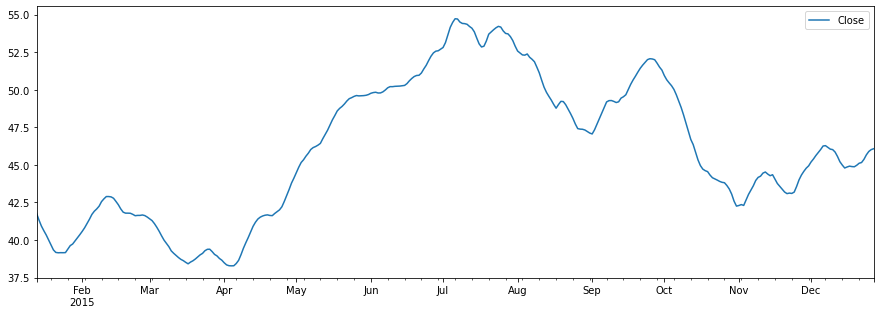

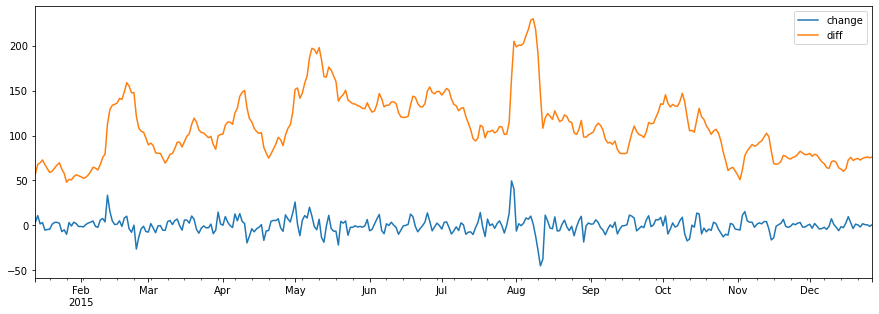

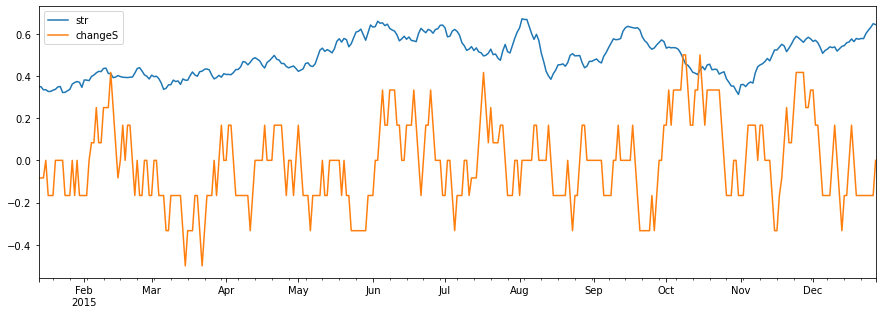

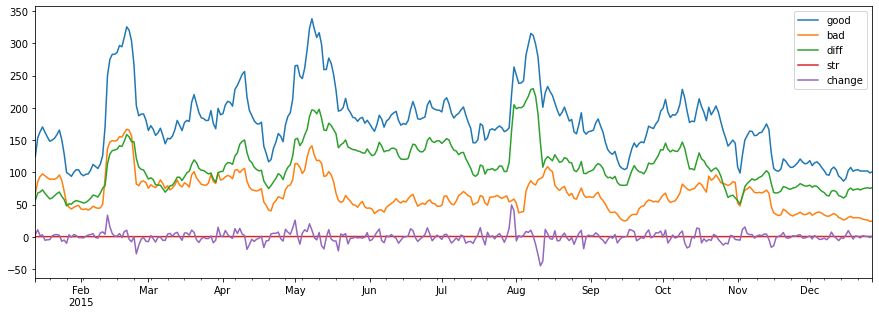

In [132]:
fromD=mini+ timedelta(days=12)
to=mini+ timedelta(days=360)
common=pd.merge(left=data, left_index=True, right=pss, right_index=True)
commonr=common.rolling(12).mean().dropna()
commonr[fromD:to][["Close"]].plot(xlim=(fromD,to))
commonr[fromD:to][["change","diff"]].plot(xlim=(fromD,to))
commonr[fromD:to][["str","changeS"]].plot(xlim=(fromD,to))
commonr[fromD:to][['good', 'bad', 'diff', 'str', 'change']].plot(xlim=(fromD,to))

In [134]:
commonr

,Open,High,Low,Close,Volume,wasNa,sentiment,good,bad,diff,str,sign,change,changeS
2015-01-12,42.608673,42.850898,41.427752,42.064669,2.488370e+07,0.416667,53.500000,103.250000,49.750000,53.500000,0.377193,1.0,6.083333,0.000000
2015-01-13,42.278797,42.562791,41.132752,41.774859,2.537677e+07,0.333333,57.000000,124.333333,67.333333,57.000000,0.349494,1.0,3.500000,-0.083333
2015-01-14,41.661464,42.095291,40.661752,41.331193,2.820489e+07,0.333333,67.916667,153.583333,85.666667,67.916667,0.348968,1.0,10.916667,-0.083333
2015-01-15,41.211381,41.669382,40.320188,40.933334,2.823104e+07,0.250000,69.666667,163.250000,93.583333,69.666667,0.334441,1.0,1.750000,-0.083333
2015-01-16,40.741399,41.259912,39.986114,40.625974,2.774917e+07,0.166667,72.833333,170.500000,97.666667,72.833333,0.334780,1.0,3.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,81.178957,82.770226,80.342156,81.995421,6.374007e+07,0.250000,365.500000,773.000000,407.500000,365.500000,0.318440,1.0,21.916667,0.000000
2019-12-28,82.478519,83.637071,81.345692,82.727754,6.056778e+07,0.333333,348.916667,722.583333,373.666667,348.916667,0.323954,1.0,-16.583333,-0.166667
2019-12-29,83.529353,84.448002,82.028269,83.365483,6.227617e+07,0.416667,338.000000,697.916667,359.916667,338.000000,0.322726,1.0,-10.916667,-0.166667
2019-12-30,84.332020,85.011003,82.506269,83.724650,6.163676e+07,0.416667,312.333333,660.166667,347.833333,312.333333,0.314640,1.0,-25.666667,-0.166667


# Results

In [18]:
# dataIn,dataOut=createTimeSeriesData(commonr[["Close","sentiment"]],outputColumns=["Close"],outputlengthTimeSteps=lookAhead,shifts=period)
# dataIn=(dataIn.to_numpy().reshape(dataIn.shape[0],period,-1))
# dataOut=(dataOut.to_numpy().reshape(dataOut.shape[0],lookAhead,-1))
# split=0.2
trainx,vtx,trainy,vty=train_test_split(dataIn,dataOut,test_size=split,shuffle=False)
vx,tx,vy,ty=train_test_split(vtx,vty,test_size=0.5,shuffle=False)
print("Total Samples:",len(dataIn),"\t\t\tTraining Samples:",len(trainx))
print("Total Validation Samples:",len(vy),"\t\tTest Samples:",len(ty))
print("Input Data Shape:",tx.shape[1:],"\t\tOutput Data Shape:",ty.shape[1:])

Total Samples: 12795 			Training Samples: 10236
Total Validation Samples: 1279 		Test Samples: 1280
Input Data Shape: (5, 1) 		Output Data Shape: (5, 1)


In [17]:
trainx,vtx,trainy,vty=train_test_split(data[:-1][["Close"]].values.reshape(-1,1,1),data[:-1][["Close"]].values.reshape(-1,1,1),test_size=0.2,shuffle=False)